# <h1><center>PYTHON CODES FOR PROJECT</center></h1>.

# Libraries

In [87]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import math
from numpy import arange

from pandas import read_csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import pylab

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import MeanCenterer
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Exploration

In [88]:
dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')

int_data=dataframe.drop(['Steel','Texp','Pa','Rc','lnRc'], axis = 1)
dataframe = pd.DataFrame(dataframe)
dataframe

,Steel,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,Pa,Rc,lnRc,Texp
0,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,60.000,4.094345,770
1,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,8.500,2.140066,805
2,GA01,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.650,-0.430783,825
3,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.050,-2.995732,840
4,GA01,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,1132.36,0.004,-5.521461,855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,6.000,1.791759,755
1268,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,3.000,1.098612,775
1269,XOM05,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,1286.59,1.500,0.405465,790
1270,XOM07,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,1286.59,1.500,0.405465,650


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


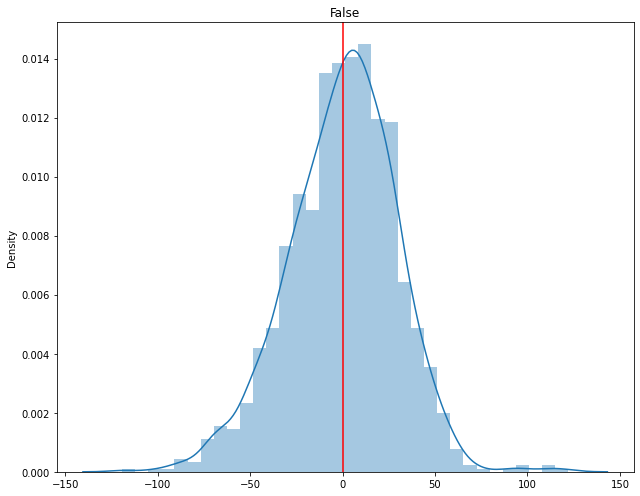

In [89]:
x=dataframe.drop(['Steel','Texp','Pa','Rc','lnRc'], axis = 1)
y=dataframe.Texp
x=x.astype(float)
y=y.astype(float)

model_Simple = sm.OLS(y, x).fit()
x2 = sm.add_constant(x, prepend=True, has_constant='skip')
model = sm.OLS(y, x2).fit()
residuals=model.resid

import seaborn as sb
fig,axes = plt.subplots(1,1,figsize=(9,7))
axlist = axes

sb.distplot(residuals,hist=True, kde=True, ax=axlist)
axlist.axvline(x=np.mean(residuals), color =  'r')
axlist.set_title(residuals.empty)
plt.tight_layout()

In [90]:
x.describe()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,0.279198,0.484733,0.945165,0.603813,0.198035,0.517162,0.037846,0.097421,2.047720
std,0.152034,0.503829,0.559432,0.668445,0.247477,0.958594,0.191431,0.217629,5.445686
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.270000,0.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.280000,0.330000,0.820000,0.410000,0.060000,0.060000,0.000000,0.000000,0.000000
75%,0.380000,0.450000,1.322500,1.070000,0.350000,0.510000,0.000000,0.180000,0.000000
max,0.860000,2.630000,5.030000,5.480000,1.320000,5.290000,2.110000,2.030000,31.600000


## Data Preprocessing - Standardization

In [91]:
x=dataframe.drop(['Steel','Texp','Pa','Rc','lnRc'], axis = 1)

y=dataframe.Texp
x=x.astype(float)
y=y.astype(float)

scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

rescaledX=pd.DataFrame(rescaledX)
data = rescaledX

data = data.set_axis(['C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB'], axis=1, inplace=False)
data.describe()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB
count,1.272000e+03,1.272000e+03,1.272000e+03,1272.000000,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03,1.272000e+03
mean,3.351617e-17,-6.703233e-17,8.937644e-17,0.000000,8.937644e-17,-3.351617e-17,-3.351617e-17,-8.379042e-17,1.117206e-16
std,1.000393e+00,1.000393e+00,1.000393e+00,1.000393,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00,1.000393e+00
min,-1.705544e+00,-9.624766e-01,-1.690174e+00,-0.903665,-8.005285e-01,-5.397128e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01
25%,-7.843330e-01,-4.263694e-01,-6.708822e-01,-0.903665,-8.005285e-01,-5.397128e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01
50%,5.276478e-03,-3.072345e-01,-2.238242e-01,-0.290060,-5.579865e-01,-4.770965e-01,-1.977777e-01,-4.478251e-01,-3.761740e-01
75%,6.632844e-01,-6.896464e-02,6.747623e-01,0.697694,6.143000e-01,-7.474246e-03,-1.977777e-01,3.795961e-01,-3.761740e-01
max,3.821722e+00,4.259605e+00,7.304632e+00,7.297688,4.535396e+00,4.980958e+00,1.082880e+01,8.883648e+00,5.428867e+00


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


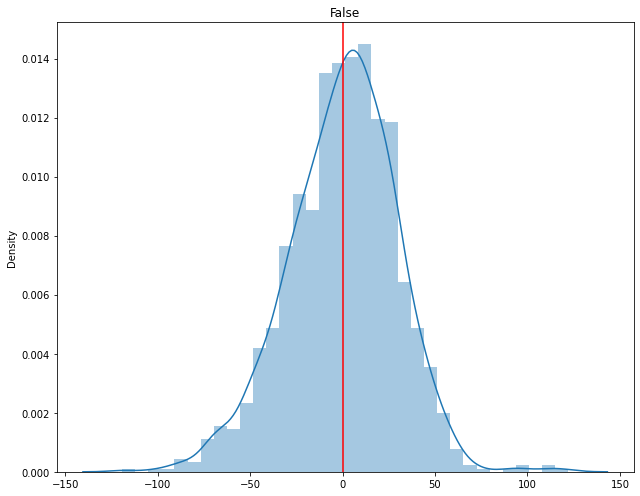

In [92]:
model_Simple = sm.OLS(y, data).fit()
x2 = sm.add_constant(data, prepend=True, has_constant='skip')
model = sm.OLS(y, x2).fit()
residuals=model.resid

import seaborn as sb
fig,axes = plt.subplots(1,1,figsize=(9,7))
axlist = axes

sb.distplot(residuals,hist=True, kde=True, ax=axlist)
axlist.axvline(x=np.mean(residuals), color =  'r')
axlist.set_title(residuals.empty)
plt.tight_layout()

std = StandardScaler()
pa=dataframe.Pa
rc=dataframe.Rc
lnrc=dataframe.lnRc

df1 = dataframe[['Pa', 'Rc', 'lnRc']]
scaler = StandardScaler().fit(df1)
rescaledX = scaler.transform(df1)

rescaledX=pd.DataFrame(rescaledX)
df2 = rescaledX

df2 = df2.set_axis(['Pa', 'Rc', 'lnRc'], axis=1, inplace=False)
#df2


# Data Division

#### Pearson Correlation

In [106]:
#Since the Data in normally Distribution, we use the Pearson Correlation
DATA=dataframe.drop(['Steel','Pa','Rc','lnRc'], axis = 1)
cor = DATA.corr()
cor_target = abs(cor["Texp"])
cor_target = pd.DataFrame(cor_target)
print(mean(cor_target))
cor_target

Texp    0.261353
dtype: float64


,Texp
C,0.459960
Si,0.114349
Mn,0.172845
Cr,0.019890
Mo,0.023583
Ni,0.419897
Al,0.182651
Cu,0.027722
ppmB,0.192632
Texp,1.000000


### Train, Test and Validation 
####  Stratified Random Sampling

In [104]:
# The Value for the pearson Correlation is closer to 0 than to 1 (0.261353)
# Hence we can't divide it equally (train:50% and Test:50%)

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
x=data

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=1 - train_ratio, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                test_size=test_ratio/(test_ratio + validation_ratio), random_state=0) 

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train1, X_test1, y_train1, y_test1 = train_test_split(df2, y, 
                                                        test_size=1 - train_ratio, random_state=0)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, 
                                                test_size=test_ratio/(test_ratio + validation_ratio), random_state=0) 

   <h1><center>Ridge REGULARIZATION</center></h1>.


   <h1><center> TRAINING</center></h1>.


### Training Sample

In [9]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_train = pd.DataFrame(y_train)

X_train1=X_train1.reset_index(drop=True)
y_train1=y_train1.reset_index(drop=True)
y_train1 = pd.DataFrame(y_train1)


### Model 

In [10]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_train)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_train), columns=interaction.get_feature_names(X_train.columns))
feature = pd.DataFrame(interaction.transform(X_train), columns=interaction.get_feature_names(X_train.columns))

features = pd.DataFrame(features)

frames = [features, X_train1]
features = pd.concat(frames, axis=1)
xx_test = features
features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.597484,-0.029253,0.115940,-0.903665,-0.800529,1.098747,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,0.097316,0.081745,0.185095,-0.033318,-0.924123,-0.265243,-1.454493
1,1.0,-0.323727,0.050170,1.671702,-0.858767,-0.800529,-0.539713,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,-0.047802,-0.040154,-0.090920,-0.033318,-0.162726,1.645089,1.906627
2,1.0,0.860687,2.631427,1.546525,0.473205,1.261079,0.764793,-0.197778,-0.447825,-0.376174,...,0.111694,0.093823,0.212442,0.067738,0.056900,0.128837,-0.033318,-0.466090,-0.262911,-0.804694
3,1.0,-0.718532,0.189161,1.296173,-0.843801,-0.760105,-0.497969,-0.041002,-0.401857,0.854642,...,-0.012524,0.026635,0.261053,-0.008205,0.017450,0.171024,0.014082,1.896272,0.272427,1.375696
4,1.0,-1.179138,-0.446225,-0.813941,-0.903665,1.018537,-0.539713,-0.197778,-0.447825,-0.376174,...,0.090212,0.075778,0.171583,-0.047802,-0.040154,-0.090920,-0.033318,0.243790,-0.265154,-1.398535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,1.0,0.597484,-0.009397,0.115940,-0.903665,0.816418,1.098747,-0.197778,-0.447825,-0.376174,...,0.072310,0.060741,0.137534,0.097316,0.081745,0.185095,-0.033318,-0.924123,-0.263269,-0.858842
950,1.0,0.531683,2.194599,0.205351,1.251435,-0.598410,-0.372736,-0.197778,0.379596,-0.376174,...,0.044926,-0.044521,0.085450,0.027983,-0.027731,0.053225,0.028242,0.138485,-0.262013,-0.693771
951,1.0,-1.376540,-0.505793,0.706056,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,5.281904,...,-0.005076,0.155859,0.653890,-0.003807,0.116884,0.490374,0.037253,0.011068,0.451860,1.496253
952,1.0,-0.915935,-0.466081,-1.171587,0.069123,1.503621,-0.539713,-0.197778,-0.447825,-0.376174,...,0.133175,0.111868,0.253300,-0.047802,-0.040154,-0.090920,-0.033318,0.052783,-0.116942,0.837223


### Regularization Path

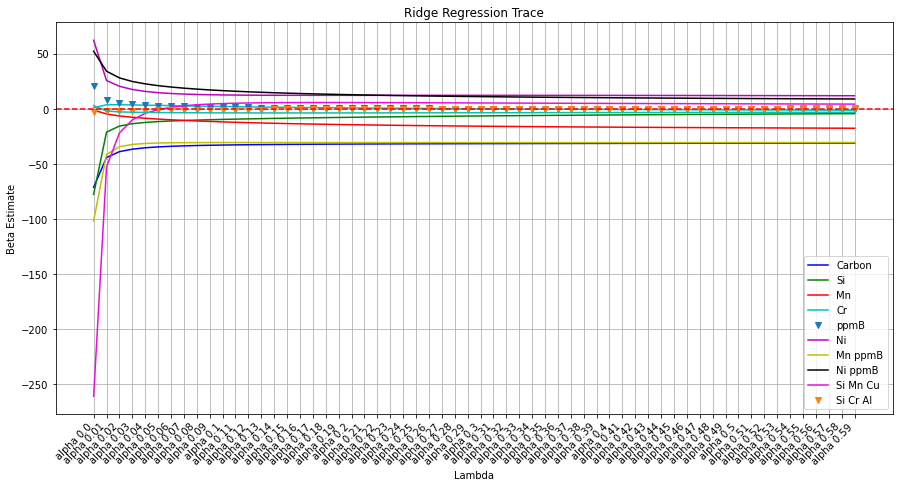

In [11]:
y_train=y_train.reset_index(drop=True)
y_train = pd.DataFrame(y_train)
x_train = features

ridge_df = pd.DataFrame({'variable': x_train.columns})
ridge_train_pred = {}
ridge_test_pred = {}

alphas = np.arange(0, 2, 0.01)

for n, alpha in enumerate(alphas):
    if (n<60):
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(x_train, y_train)
        var_name = 'alpha ' + str(round(alpha,3))
        ridge_df[var_name] = ridge_reg.coef_.reshape(-1)
        ridge_train_pred['alpha '+str(round(alpha,3))]=ridge_reg.predict(x_train)
        ridge_test_pred['alpha '+str(round(alpha,3))]=ridge_reg.predict(xx_test)

    else:
        pass
ridge_df =ridge_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(ridge_df.C,'b', ridge_df.Si, 'g', ridge_df.Mn, 'r', ridge_df.Cr, 'c', ridge_df.Mo, 'v',
        ridge_df.Al, 'm', ridge_df.Ni, 'y',ridge_df["Mn ppmB"],'k', ridge_df["Ni ppmB"],'#ED0DD9', 
        ridge_df["Si Mn Cu"], 'v', ridge_df["Si Cr Al"], '#06C2AC')
ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])

fig.autofmt_xdate(rotation=45)
ax.grid(True)

### Getting the Alpha Value Using the RMSE

In [12]:

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(ridge_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in ridge_test_pred.keys():
    predicted = ridge_test_pred[alpha ] 
    observed = y_test.values
    RMSE(predicted, observed)
    #my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    #ds[alpha]=my_rho,rms
    dz[alpha]=rms
    #dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
#print (df1)


### Perfomance Criteria

In [13]:
model = sm.OLS(y_train, x_train)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     58.37
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:38:38   Log-Likelihood:                -3922.2
No. Observations:                 954   AIC:                             8110.
Df Residuals:                     821   BIC:                             8757.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            706.4999     31.363     22.526      0.000     644.938     768.062
C            -42.0459     24.915     -1.688      0.092     -90.951       6.859
Si           -20.1153     60.339     -0.333      0.739    -138.552      98.321
Mn            -8.5297     10.151     -0.840      0.401     -28.455      11.396
Cr             3.4974      7.405      0.472      0.637     -11.037      18.032
Mo             3.0601     12.639      0.242      0.809     -21.748      27.869
Ni           -50.2989     52.378     -0.960      0.337    -153.109      52.512
Al            -7.9344     89.303     -0.089      0.929    -183.224     167.355
Cu             2.5475     36.815      0.069      0.945     -69.716      74.811
ppmB         -34.7030     77.957     -0.445      0.656    -187.722     118.316
C Si          12.3245     19.014      0.648      0.517     -24.998      49.647
C Mn           4.9700      5.547      0.896      0.371      -5.919      15.859
C Cr           8.0644      6.366      1.267      0.206      -4.432      20.560
C Mo           3.1429      4.033      0.779      0.436      -4.773      11.058
C Ni          -5.9350     38.510     -0.154      0.878     -81.526      69.656
C Al         -26.3077     37.439     -0.703      0.482     -99.796      47.181
C Cu         -11.2707     21.176     -0.532      0.595     -52.837      30.295
C ppmB       -17.5616     65.636     -0.268      0.789    -146.397     111.273
Si Mn         19.5819     10.214      1.917      0.056      -0.467      39.631
Si Cr          4.2201     14.152      0.298      0.766     -23.559      31.999
Si Mo         15.6705     16.036      0.977      0.329     -15.805      47.147
Si Ni         -2.8394     52.084     -0.055      0.957    -105.072      99.393
Si Al        -37.0908     99.537     -0.373      0.710    -232.469     158.287
Si Cu        -25.4244    132.531     -0.192      0.848    -285.564     234.716
Si ppmB      -34.0090    156.813     -0.217      0.828    -341.810     273.792
Mn Cr         -4.1036      3.227     -1.272      0.204     -10.438       2.231
Mn Mo         -9.5065      3.199     -2.971      0.003     -15.787      -3.226
Mn Ni          2.5534     15.244      0.168      0.867     -27.369      32.476
Mn Al         32.9174     33.738      0.976      0.330     -33.305      99.139
Mn Cu          8.6601     14.711      0.589      0.556     -20.215      37.535
Mn ppmB       24.2147     23.843      1.016      0.310     -22.585      71.014
Cr Mo         -3.7945      2.561     -1.482      0.139      -8.822       1.233
Cr Ni          1.4100     12.241      0.115      0.908     -22.618      25.438
Cr Al         14.7374     23.683      0.622      0.534     -31.748      61.223
Cr Cu          4.5152     11.738      0.385      0.701     -18.525      27.556
Cr ppmB       26.1020     16.023      1.629      0.104      -5.349      57.553
Mo

   <h1><center> TESTING</center></h1>.


In [14]:
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test)

X_test1=X_test1.reset_index(drop=True)
y_test1=y_test1.reset_index(drop=True)
y_test1 = pd.DataFrame(y_test1)

### Model 

In [15]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_test)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_test), columns=interaction.get_feature_names(X_test.columns))
feature = pd.DataFrame(interaction.transform(X_test), columns=interaction.get_feature_names(X_test.columns))

features = pd.DataFrame(features)
frames = [features, X_test1]
features = pd.concat(frames, axis=1)

features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.663284,-0.287379,-0.420530,-0.005706,-0.800529,-0.539713,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,-0.047802,-0.040154,-0.090920,-0.033318,-0.920059,-0.250978,-0.127706
1,1.0,-0.521130,0.308296,0.580880,-0.724073,-0.800529,-0.539713,-0.197778,0.517500,-0.376174,...,0.081934,-0.059558,0.155839,0.055240,-0.040154,0.105066,0.038501,-0.162726,0.631293,1.589764
2,1.0,-0.389528,-0.386658,-0.599353,0.727626,0.371758,-0.153579,-0.197778,0.425564,-0.376174,...,-0.031290,0.027658,-0.059513,0.012926,-0.011426,0.024586,0.031661,-0.251895,-0.260040,-0.520620
3,1.0,1.321292,-0.227811,-0.116530,-0.903665,1.139808,-0.539713,-0.197778,-0.447825,-0.376174,...,0.100953,0.084800,0.192012,-0.047802,-0.040154,-0.090920,-0.033318,-1.137362,-0.250978,-0.127706
4,1.0,-1.047536,-0.366802,-0.831823,0.039192,0.129216,3.269445,-0.197778,-0.447825,-0.376174,...,0.011445,0.009614,0.021768,0.289574,0.243243,0.550771,-0.033318,-0.594942,-0.250978,-0.127706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.0,-1.376540,-0.505793,0.706056,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,4.234792,...,-0.005076,0.124961,0.524259,-0.003807,0.093712,0.393160,0.029868,0.011068,0.003278,1.085223
124,1.0,0.794886,-0.108676,-0.116530,-0.903665,1.058960,-0.539713,-0.197778,-0.447825,-0.376174,...,0.093792,0.078785,0.178393,-0.047802,-0.040154,-0.090920,-0.033318,-1.137362,-0.250978,-0.127706
125,1.0,-0.060524,-0.088820,0.205351,2.209258,0.897266,0.837846,0.063516,0.655403,-0.376174,...,0.037352,-0.021438,-0.221217,0.034878,-0.020019,-0.206567,-0.015660,-0.426287,-0.260129,-0.527117
126,1.0,1.452894,-0.068965,-0.134413,0.982048,0.856842,-0.414480,-0.197778,0.517500,-0.376174,...,-0.087698,0.063748,-0.166801,0.042422,-0.030837,0.080687,0.038501,1.682196,-0.262283,-0.724078


/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


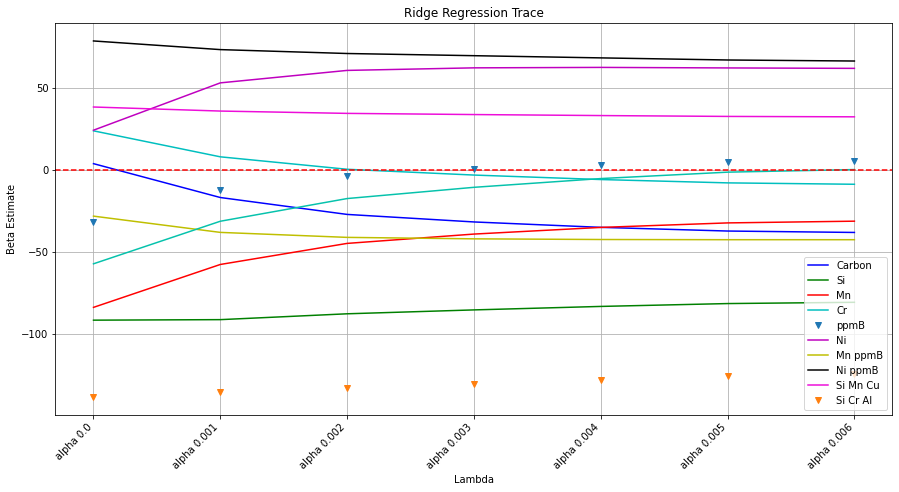

In [16]:
y_test=y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test)
xx_test = features
x_test = features

ridge_df = pd.DataFrame({'variable': x_test.columns})
ridge_test_pred = {}

alphas = np.arange(0, 0.2, 0.0001)

for n, alpha in enumerate(alphas):
    if (n<60):
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(x_test, y_test)
        var_name = 'alpha ' + str(round(alpha,3))
        ridge_df[var_name] = ridge_reg.coef_.reshape(-1)
        ridge_test_pred['alpha '+str(round(alpha,3))]=ridge_reg.predict(x_test)
    else:
        pass
ridge_df =ridge_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(ridge_df.C,'b', ridge_df.Si, 'g', ridge_df.Mn, 'r', ridge_df.Cr, 'c', ridge_df.Mo, 'v',
        ridge_df.Al, 'm', ridge_df.Ni, 'y',ridge_df["Mn ppmB"],'k', ridge_df["Ni ppmB"],'#ED0DD9', 
        ridge_df["Si Mn Cu"], 'v', ridge_df["Si Cr Al"], '#06C2AC')
ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])

fig.autofmt_xdate(rotation=45)
ax.grid(True)

In [17]:

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(ridge_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in ridge_test_pred.keys():
    predicted = ridge_test_pred[alpha ] 
    observed = y_test.values
    RMSE(predicted, observed)
    my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
#print (df1)


/home/dave/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/dave/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/dave/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [18]:
y_test=y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test)
x_test = features

model = sm.OLS(y_test, x_test)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=0, alpha=0.001, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     4.929
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           2.03e-05
Time:                        12:38:40   Log-Likelihood:                -476.56
No. Observations:                 128   AIC:                             1161.
Df Residuals:                      24   BIC:                             1458.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            670.9908   2557.291      0.262      0.795   -4606.998    5948.979
C            -56.2096   1.88e+04     -0.003      0.998   -3.89e+04    3.88e+04
Si           -75.8926   1.06e+04     -0.007      0.994   -2.19e+04    2.18e+04
Mn           -13.1448   3771.547     -0.003      0.997   -7797.236    7770.946
Cr           -21.4254   5232.593     -0.004      0.997   -1.08e+04    1.08e+04
Mo             9.2496   3569.286      0.003      0.998   -7357.394    7375.893
Ni           -69.7761   2037.511     -0.034      0.973   -4274.991    4135.439
Al           -12.3784   1.01e+04     -0.001      0.999   -2.09e+04    2.09e+04
Cu            -0.9268   1072.961     -0.001      0.999   -2215.410    2213.557
ppmB         -81.9412   3398.117     -0.024      0.981   -7095.310    6931.428
C Si          -9.2020   3.53e+04     -0.000      1.000   -7.28e+04    7.28e+04
C Mn          15.2162    970.916      0.016      0.988   -1988.656    2019.089
C Cr           9.5492   9725.515      0.001      0.999   -2.01e+04    2.01e+04
C Mo         -15.9472   3022.553     -0.005      0.996   -6254.190    6222.296
C Ni          -5.6320   1.16e+04     -0.000      1.000   -2.39e+04    2.38e+04
C Al           1.6298   1.89e+04   8.61e-05      1.000   -3.91e+04    3.91e+04
C Cu         -14.7233   1.91e+04     -0.001      0.999   -3.94e+04    3.93e+04
C ppmB       -44.7018   4.08e+04     -0.001      0.999   -8.42e+04    8.42e+04
Si Mn        -13.0263   3.06e+04     -0.000      1.000   -6.32e+04    6.32e+04
Si Cr        -24.3865   1.55e+04     -0.002      0.999    -3.2e+04    3.19e+04
Si Mo          9.2211   1.17e+04      0.001      0.999   -2.41e+04    2.42e+04
Si Ni        -48.2671   7306.088     -0.007      0.995   -1.51e+04     1.5e+04
Si Al         -7.4920   1.07e+04     -0.001      0.999   -2.21e+04    2.21e+04
Si Cu         12.7906   1.11e+04      0.001      0.999   -2.28e+04    2.28e+04
Si ppmB      -24.4684   3.36e+04     -0.001      0.999   -6.95e+04    6.94e+04
Mn Cr          7.9899    799.683      0.010      0.992   -1642.475    1658.455
Mn Mo         -8.7984   5781.952     -0.002      0.999   -1.19e+04    1.19e+04
Mn Ni        -24.9263   1.22e+04     -0.002      0.998   -2.52e+04    2.51e+04
Mn Al        -16.9359   1.91e+04     -0.001      0.999   -3.95e+04    3.94e+04
Mn Cu         -8.9523   1.36e+04     -0.001      0.999   -2.82e+04    2.81e+04
Mn ppmB       47.7149   2489.906      0.019      0.985   -5091.198    5186.628
Cr Mo         16.5060   4704.945      0.004      0.997   -9694.023    9727.035
Cr Ni          3.3084    266.286      0.012      0.990    -546.279     552.896
Cr Al         -2.3944   8934.833     -0.000      1.000   -1.84e+04    1.84e+04
Cr Cu         -7.5613   3406.731     -0.002      0.998   -7038.708    7023.586
Cr ppmB        9.9090   6174.783      0.002      0.999   -1.27e+04    1.28e+04
Mo

   <h1><center> VALIDATION </center></h1>.


In [19]:
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)
y_val = pd.DataFrame(y_val)

X_val1=X_val1.reset_index(drop=True)
y_val1=y_val1.reset_index(drop=True)
y_val1 = pd.DataFrame(y_val1)


### Model 

In [20]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_val)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_val), columns=interaction.get_feature_names(X_val.columns))
feature = pd.DataFrame(interaction.transform(X_val), columns=interaction.get_feature_names(X_val.columns))

features = pd.DataFrame(features)
frames = [features, X_val1]
features = pd.concat(frames, axis=1)

features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.597484,-0.128532,-0.027119,-0.903665,0.816418,0.316043,-0.197778,-0.447825,-0.376174,...,0.072310,0.060741,0.137534,0.027992,0.023513,0.053241,-0.033318,-0.924123,-0.239046,0.118895
1,1.0,-1.376540,-0.525649,0.670292,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,0.652567,...,-0.005076,0.019256,0.080787,-0.003807,0.014441,0.060585,0.004603,0.011068,-0.176155,0.624835
2,1.0,-1.310739,-0.485937,-0.563588,0.847354,-0.719681,-0.289248,-0.041002,0.333628,1.130197,...,0.009845,0.033350,-0.271367,0.003957,0.013404,-0.109065,-0.015460,-0.162726,0.631293,1.589764
3,1.0,0.400081,-0.307235,-0.599353,0.952116,0.735571,-0.539713,-0.197778,-0.447825,-0.376174,...,0.065149,0.054726,0.123914,-0.047802,-0.040154,-0.090920,-0.033318,-0.703234,-0.264436,-1.108062
4,1.0,0.465882,0.070026,-0.027119,-0.275094,2.554636,-0.539713,-0.197778,-0.447825,-0.376174,...,0.226264,0.190062,0.430354,-0.047802,-0.040154,-0.090920,-0.033318,-0.694987,-0.254029,-0.223749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.0,-1.113337,-0.327090,-0.384765,-0.469652,0.856842,-0.539713,-0.197778,-0.447825,2.140568,...,0.075890,-0.362750,-0.821369,-0.047802,0.228491,0.517369,0.189590,0.187970,-0.262641,-0.768231
186,1.0,0.860687,2.651283,1.582290,0.473205,-0.557987,0.796102,-0.197778,-0.447825,-0.376174,...,-0.049421,-0.041514,-0.093999,0.070511,0.059229,0.134111,-0.033318,-0.580598,-0.263000,-0.817589
187,1.0,0.005276,-0.207955,1.474996,-0.454686,0.533453,-0.414480,-0.041002,0.747339,2.379383,...,-0.016346,-0.052043,0.948589,0.012701,0.040436,-0.737031,-0.072909,-0.140733,-0.264346,-1.082656
188,1.0,-0.915935,-0.505793,-1.028529,1.535789,-0.557987,1.265724,-0.197778,0.563468,-0.376174,...,0.062183,-0.041514,0.118272,-0.141054,0.094168,-0.268285,0.041921,-0.539361,-0.260488,-0.554163


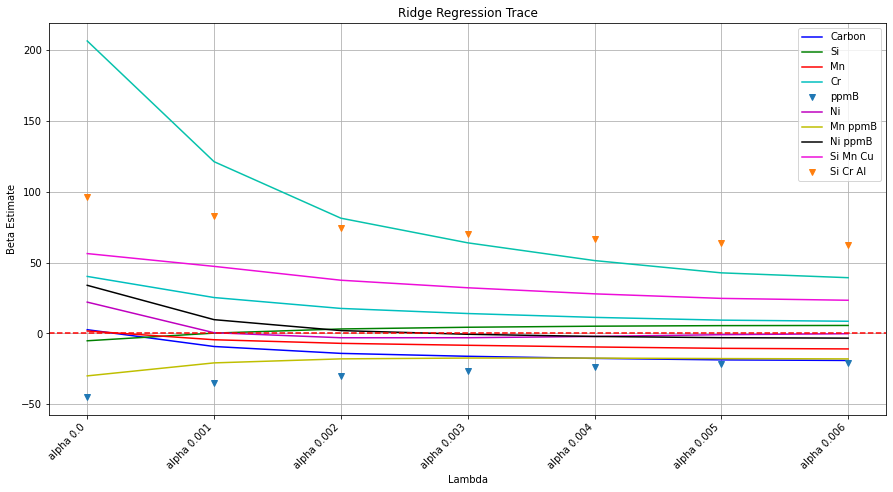

In [21]:
y_val=y_val.reset_index(drop=True)
y_val = pd.DataFrame(y_val)
x_val = features

ridge_df = pd.DataFrame({'variable': x_val.columns})
ridge_val_pred = {}
#ridge_test_pred = {}

alphas = np.arange(0, 0.2, 0.0001)

for n, alpha in enumerate(alphas):
    if (n<60):
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(x_val, y_val)
        var_name = 'alpha ' + str(round(alpha,3))
        ridge_df[var_name] = ridge_reg.coef_.reshape(-1)
        # prediction
        ridge_val_pred['alpha '+str(round(alpha,3))]=ridge_reg.predict(x_val)
       # ridge_test_pred['alpha '+str(round(alpha,3))]=ridge_reg.predict(x_test.T)
    else:
        pass
ridge_df =ridge_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))
#ax.plot(ridge_df.C,'r', ridge_df.Si, 'g', ridge_df.Mn, 'b', ridge_df.Cr, 'c', ridge_df.Al, 'k')

ax.plot(ridge_df.C,'b', ridge_df.Si, 'g', ridge_df.Mn, 'r', ridge_df.Cr, 'c', ridge_df.Mo, 'v',
        ridge_df.Al, 'm', ridge_df.Ni, 'y',ridge_df["Mn ppmB"],'k', ridge_df["Ni ppmB"],'#ED0DD9', 
        ridge_df["Si Mn Cu"], 'v', ridge_df["Si Cr Al"], '#06C2AC')
ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=12)
#ax.legend(labels=['Carbon','Si','Mn','Cr','Mo', 'NiMo', 'SiMo'])
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])

fig.autofmt_xdate(rotation=45)
ax.grid(True)

In [22]:
y_val =y_val.reset_index(drop=True)
y_val = pd.DataFrame(y_val)
x_val = features
model = sm.OLS(y_val, x_val)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=0, alpha=0.001, start_params=results_fu.params)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           2.76e-22
Time:                        12:38:42   Log-Likelihood:                -718.72
No. Observations:                 190   AIC:                             1663.
Df Residuals:                      77   BIC:                             2030.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            685.8608     61.462     11.159      0.000     563.474     808.247
C            -46.8917    117.594     -0.399      0.691    -281.051     187.268
Si           -20.5679    385.970     -0.053      0.958    -789.133     747.997
Mn           -13.6053    255.985     -0.053      0.958    -523.336     496.125
Cr             1.0994    185.075      0.006      0.995    -367.432     369.631
Mo             1.7819    145.175      0.012      0.990    -287.298     290.862
Ni           -53.8939    309.107     -0.174      0.862    -669.404     561.616
Al           -27.6036    604.013     -0.046      0.964   -1230.348    1175.140
Cu             5.7762    184.491      0.031      0.975    -361.592     373.144
ppmB         -46.7773    235.293     -0.199      0.843    -515.306     421.751
C Si          17.0032    675.808      0.025      0.980   -1328.701    1362.708
C Mn          17.9315    335.420      0.053      0.958    -649.975     685.838
C Cr          16.5505    152.659      0.108      0.914    -287.432     320.533
C Mo          -1.2404    191.561     -0.006      0.995    -382.687     380.206
C Ni          21.6322    398.848      0.054      0.957    -772.575     815.840
C Al         -58.6867    327.708     -0.179      0.858    -711.236     593.863
C Cu          17.5213    504.199      0.035      0.972    -986.468    1021.511
C ppmB       -63.1603    352.044     -0.179      0.858    -764.170     637.849
Si Mn         15.4086    205.379      0.075      0.940    -393.554     424.371
Si Cr         -4.6112    392.159     -0.012      0.991    -785.500     776.278
Si Mo         13.3275    221.387      0.060      0.952    -427.511     454.166
Si Ni        -27.2663    541.997     -0.050      0.960   -1106.521    1051.988
Si Al         -8.7248   1088.176     -0.008      0.994   -2175.560    2158.110
Si Cu          1.7080    212.276      0.008      0.994    -420.987     424.403
Si ppmB       10.6856    671.431      0.016      0.987   -1326.305    1347.676
Mn Cr         -4.4383    256.271     -0.017      0.986    -514.739     505.863
Mn Mo        -11.4144    137.507     -0.083      0.934    -285.226     262.397
Mn Ni          2.6072    351.625      0.007      0.994    -697.567     702.782
Mn Al          1.0208    753.171      0.001      0.999   -1498.735    1500.776
Mn Cu          3.2677    521.023      0.006      0.995   -1034.221    1040.757
Mn ppmB       14.6501    837.404      0.017      0.986   -1652.835    1682.135
Cr Mo        -11.3368     93.000     -0.122      0.903    -196.523     173.849
Cr Ni         -0.2917     80.076     -0.004      0.997    -159.743     159.159
Cr Al         33.7297    442.663      0.076      0.939    -847.726     915.185
Cr Cu        -12.0232    108.571     -0.111      0.912    -228.216     204.169
Cr ppmB       39.8379    634.728      0.063      0.950   -1224.067    1303.743
Mo

#   <h1><center>LASSO REGULARIZATION!</center></h1>.

   <h1><center> TRAINING</center></h1>.


In [23]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_train = pd.DataFrame(y_train)

X_train1=X_train1.reset_index(drop=True)
y_train1=y_train1.reset_index(drop=True)
y_train1 = pd.DataFrame(y_train1)

### Model 


In [24]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_train)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_train), columns=interaction.get_feature_names(X_train.columns))
feature = pd.DataFrame(interaction.transform(X_train), columns=interaction.get_feature_names(X_train.columns))

features = pd.DataFrame(features)
frames = [features, X_train1]
features = pd.concat(frames, axis=1)

features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.597484,-0.029253,0.115940,-0.903665,-0.800529,1.098747,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,0.097316,0.081745,0.185095,-0.033318,-0.924123,-0.265243,-1.454493
1,1.0,-0.323727,0.050170,1.671702,-0.858767,-0.800529,-0.539713,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,-0.047802,-0.040154,-0.090920,-0.033318,-0.162726,1.645089,1.906627
2,1.0,0.860687,2.631427,1.546525,0.473205,1.261079,0.764793,-0.197778,-0.447825,-0.376174,...,0.111694,0.093823,0.212442,0.067738,0.056900,0.128837,-0.033318,-0.466090,-0.262911,-0.804694
3,1.0,-0.718532,0.189161,1.296173,-0.843801,-0.760105,-0.497969,-0.041002,-0.401857,0.854642,...,-0.012524,0.026635,0.261053,-0.008205,0.017450,0.171024,0.014082,1.896272,0.272427,1.375696
4,1.0,-1.179138,-0.446225,-0.813941,-0.903665,1.018537,-0.539713,-0.197778,-0.447825,-0.376174,...,0.090212,0.075778,0.171583,-0.047802,-0.040154,-0.090920,-0.033318,0.243790,-0.265154,-1.398535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,1.0,0.597484,-0.009397,0.115940,-0.903665,0.816418,1.098747,-0.197778,-0.447825,-0.376174,...,0.072310,0.060741,0.137534,0.097316,0.081745,0.185095,-0.033318,-0.924123,-0.263269,-0.858842
950,1.0,0.531683,2.194599,0.205351,1.251435,-0.598410,-0.372736,-0.197778,0.379596,-0.376174,...,0.044926,-0.044521,0.085450,0.027983,-0.027731,0.053225,0.028242,0.138485,-0.262013,-0.693771
951,1.0,-1.376540,-0.505793,0.706056,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,5.281904,...,-0.005076,0.155859,0.653890,-0.003807,0.116884,0.490374,0.037253,0.011068,0.451860,1.496253
952,1.0,-0.915935,-0.466081,-1.171587,0.069123,1.503621,-0.539713,-0.197778,-0.447825,-0.376174,...,0.133175,0.111868,0.253300,-0.047802,-0.040154,-0.090920,-0.033318,0.052783,-0.116942,0.837223


<ipython-input-25-e31e5b105b7f>:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104659.59224879753, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95699.10700739778, tolerance: 216.0140603773585
  model 

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5410.312386780715, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4855.684989676636, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4320.4667862906645, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Conv

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.771068639413, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589.8973258807673, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672.6381722550723, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Conver

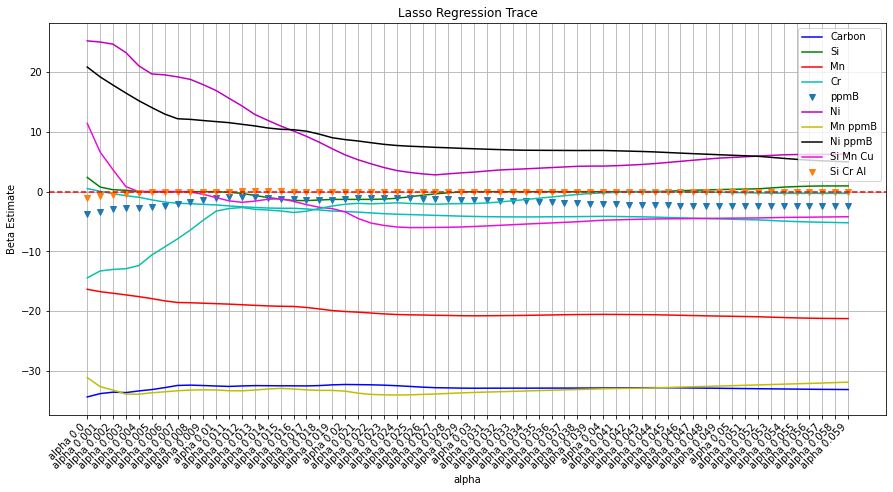

In [25]:
y_train=y_train.reset_index(drop=True)
y_train = pd.DataFrame(y_train)
x_train = features
lasso_df = pd.DataFrame({'variable': x_train.columns})
lasso_train_pred = {}
lasso_test_pred = {}

#alphas = np.arange(0, 0.001, 0.0001)
#alphas = np.arange(0.00001, 0.1, 0.00001)
alphas = np.arange(0, 1, 0.001)
#alphas = np.arange(0, 1, 0.01)
for n, alpha in enumerate(alphas):
    if (n<60):
        lasso_reg = Lasso(alpha=alpha)
        lasso_reg.fit(x_train, y_train)
        var_name = 'alpha ' + str(round(alpha,5))
        lasso_df[var_name] = lasso_reg.coef_.reshape(-1)
        lasso_train_pred['alpha '+str(round(alpha,3))]=lasso_reg.predict(x_train)
        lasso_test_pred['alpha '+str(round(alpha,3))]=lasso_reg.predict(xx_test)

    else:
        pass

lasso_df =lasso_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lasso_df.C,'b', lasso_df.Si, 'g', lasso_df.Mn, 'r', lasso_df.Cr, 'c', lasso_df.Mo, 'v',
        lasso_df.Al, 'm', lasso_df.Ni, 'y',lasso_df["Mn ppmB"],'k', lasso_df["Ni ppmB"],'#ED0DD9', 
        lasso_df["Si Mn Cu"], 'v', lasso_df["Si Cr Al"], '#06C2AC')
    
ax.set_xlabel("alpha")
ax.axhline(y=0, color='red', linestyle='--')

ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])

fig.autofmt_xdate(rotation=45)
ax.grid(True)

### Getting the Alpha Value Using the RMSE

In [26]:

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(lasso_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in lasso_test_pred.keys():
    predicted = lasso_test_pred[alpha ] 
    observed = y_test.values
    RMSE(predicted, observed)
    #my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
#print (df1)


In [27]:
model = sm.OLS(y_train, x_train)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=1, alpha=0.059, start_params=results_fu.params, refit=False)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final_lasso = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     56.68
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:38:57   Log-Likelihood:                -3934.8
No. Observations:                 954   AIC:                             8136.
Df Residuals:                     821   BIC:                             8782.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            669.8437     31.781     21.077      0.000     607.463     732.224
C            -67.2950     25.247     -2.665      0.008    -116.851     -17.739
Si           -74.8232     61.141     -1.224      0.221    -194.835      45.189
Mn            -1.6920     10.286     -0.164      0.869     -21.883      18.499
Cr                  0      7.503          0      1.000     -14.728      14.728
Mo            19.4212     12.807      1.516      0.130      -5.717      44.560
Ni           -95.5779     53.075     -1.801      0.072    -199.756       8.600
Al            59.7692     90.491      0.660      0.509    -117.852     237.390
Cu           -55.0384     37.305     -1.475      0.141    -128.263      18.186
ppmB        -186.0267     78.994     -2.355      0.019    -341.082     -30.972
C Si           2.7523     19.267      0.143      0.886     -35.066      40.571
C Mn           1.7473      5.621      0.311      0.756      -9.286      12.781
C Cr           8.6028      6.451      1.334      0.183      -4.059      21.265
C Mo                0      4.086          0      1.000      -8.021       8.021
C Ni         -59.0166     39.023     -1.512      0.131    -135.613      17.580
C Al         -26.4031     37.937     -0.696      0.487    -100.869      48.063
C Cu         -11.3735     21.458     -0.530      0.596     -53.492      30.745
C ppmB       -86.0004     66.510     -1.293      0.196    -216.549      44.548
Si Mn         24.9829     10.350      2.414      0.016       4.667      45.298
Si Cr          2.4372     14.341      0.170      0.865     -25.711      30.586
Si Mo         29.9302     16.249      1.842      0.066      -1.965      61.825
Si Ni        -10.5723     52.776     -0.200      0.841    -114.165      93.020
Si Al         21.2798    100.862      0.211      0.833    -176.697     219.257
Si Cu       -120.8035    134.294     -0.900      0.369    -384.404     142.797
Si ppmB     -229.4428    158.899     -1.444      0.149    -541.339      82.453
Mn Cr         -2.8760      3.270     -0.880      0.379      -9.294       3.542
Mn Mo         -5.6907      3.242     -1.755      0.080     -12.054       0.673
Mn Ni         16.6306     15.447      1.077      0.282     -13.690      46.951
Mn Al         29.5094     34.186      0.863      0.388     -37.594      96.612
Mn Cu               0     14.906          0      1.000     -29.259      29.259
Mn ppmB       48.5100     24.160      2.008      0.045       1.088      95.932
Cr Mo         -0.6523      2.595     -0.251      0.802      -5.746       4.442
Cr Ni        -20.6040     12.404     -1.661      0.097     -44.951       3.743
Cr Al        -15.1711     23.998     -0.632      0.527     -62.275      31.933
Cr Cu         13.9677     11.894      1.174      0.241      -9.379      37.315
Cr ppmB       31.7194     16.236      1.954      0.051      -0.149      63.588
Mo

   <h1><center> TESTING </center></h1>.


In [28]:
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test)

X_test1=X_test1.reset_index(drop=True)
y_test1=y_test1.reset_index(drop=True)
y_test1 = pd.DataFrame(y_test1)

In [29]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_test)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_test), columns=interaction.get_feature_names(X_test.columns))
feature = pd.DataFrame(interaction.transform(X_test), columns=interaction.get_feature_names(X_test.columns))

features = pd.DataFrame(features)
frames = [features, X_test1]
features = pd.concat(frames, axis=1)

features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.663284,-0.287379,-0.420530,-0.005706,-0.800529,-0.539713,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,-0.047802,-0.040154,-0.090920,-0.033318,-0.920059,-0.250978,-0.127706
1,1.0,-0.521130,0.308296,0.580880,-0.724073,-0.800529,-0.539713,-0.197778,0.517500,-0.376174,...,0.081934,-0.059558,0.155839,0.055240,-0.040154,0.105066,0.038501,-0.162726,0.631293,1.589764
2,1.0,-0.389528,-0.386658,-0.599353,0.727626,0.371758,-0.153579,-0.197778,0.425564,-0.376174,...,-0.031290,0.027658,-0.059513,0.012926,-0.011426,0.024586,0.031661,-0.251895,-0.260040,-0.520620
3,1.0,1.321292,-0.227811,-0.116530,-0.903665,1.139808,-0.539713,-0.197778,-0.447825,-0.376174,...,0.100953,0.084800,0.192012,-0.047802,-0.040154,-0.090920,-0.033318,-1.137362,-0.250978,-0.127706
4,1.0,-1.047536,-0.366802,-0.831823,0.039192,0.129216,3.269445,-0.197778,-0.447825,-0.376174,...,0.011445,0.009614,0.021768,0.289574,0.243243,0.550771,-0.033318,-0.594942,-0.250978,-0.127706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.0,-1.376540,-0.505793,0.706056,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,4.234792,...,-0.005076,0.124961,0.524259,-0.003807,0.093712,0.393160,0.029868,0.011068,0.003278,1.085223
124,1.0,0.794886,-0.108676,-0.116530,-0.903665,1.058960,-0.539713,-0.197778,-0.447825,-0.376174,...,0.093792,0.078785,0.178393,-0.047802,-0.040154,-0.090920,-0.033318,-1.137362,-0.250978,-0.127706
125,1.0,-0.060524,-0.088820,0.205351,2.209258,0.897266,0.837846,0.063516,0.655403,-0.376174,...,0.037352,-0.021438,-0.221217,0.034878,-0.020019,-0.206567,-0.015660,-0.426287,-0.260129,-0.527117
126,1.0,1.452894,-0.068965,-0.134413,0.982048,0.856842,-0.414480,-0.197778,0.517500,-0.376174,...,-0.087698,0.063748,-0.166801,0.042422,-0.030837,0.080687,0.038501,1.682196,-0.262283,-0.724078


<ipython-input-30-cdc1fe4e798c>:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_test, y_test)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3907.3600088388425, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6131.829504889106, tolerance: 28.445321875
  model = cd_fast.en

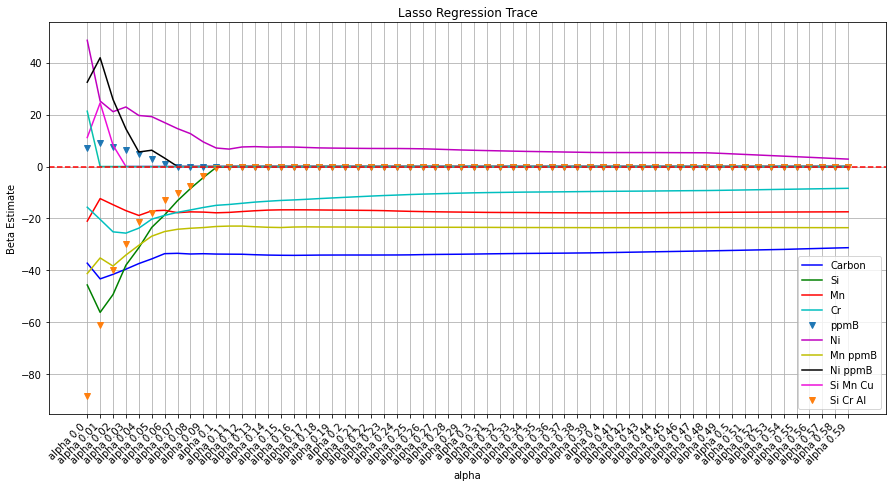

In [30]:
y_test=y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test)
x_test = features


lasso_df = pd.DataFrame({'variable': x_test.columns})
lasso_test_pred = {}
lasso_val_pred = {}

#alphas = np.arange(0, 0.001, 0.0001)
#alphas = np.arange(0.00001, 0.1, 0.00001)
alphas = np.arange(0, 1, 0.01)

for n, alpha in enumerate(alphas):
    if (n<60):
        lasso_reg = Lasso(alpha=alpha)
        lasso_reg.fit(x_test, y_test)
        var_name = 'alpha ' + str(round(alpha,5))
        lasso_df[var_name] = lasso_reg.coef_.reshape(-1)
        lasso_test_pred['alpha '+str(round(alpha,3))]=lasso_reg.predict(x_test)
        lasso_val_pred['alpha '+str(round(alpha,3))]=lasso_reg.predict(x_val)

    else:
        pass

lasso_df =lasso_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lasso_df.C,'b', lasso_df.Si, 'g', lasso_df.Mn, 'r', lasso_df.Cr, 'c', lasso_df.Mo, 'v',
        lasso_df.Al, 'm', lasso_df.Ni, 'y',lasso_df["Mn ppmB"],'k', lasso_df["Ni ppmB"],'#ED0DD9', 
        lasso_df["Si Mn Cu"], 'v', lasso_df["Si Cr Al"], '#06C2AC')
    
ax.set_xlabel("alpha")
ax.axhline(y=0, color='red', linestyle='--')

#ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])

fig.autofmt_xdate(rotation=45)
ax.grid(True)

In [31]:

def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(lasso_val_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in lasso_val_pred.keys():
    predicted = lasso_val_pred[alpha ] 
    observed = y_val.values
    RMSE(predicted, observed)
    #my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
#print (df1)


In [32]:
model = sm.OLS(y_train, x_train)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=1, alpha=0.059, start_params=results_fu.params, refit=False)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final_lasso = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     56.68
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:39:04   Log-Likelihood:                -3934.8
No. Observations:                 954   AIC:                             8136.
Df Residuals:                     821   BIC:                             8782.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            669.8437     31.781     21.077      0.000     607.463     732.224
C            -67.2950     25.247     -2.665      0.008    -116.851     -17.739
Si           -74.8232     61.141     -1.224      0.221    -194.835      45.189
Mn            -1.6920     10.286     -0.164      0.869     -21.883      18.499
Cr                  0      7.503          0      1.000     -14.728      14.728
Mo            19.4212     12.807      1.516      0.130      -5.717      44.560
Ni           -95.5779     53.075     -1.801      0.072    -199.756       8.600
Al            59.7692     90.491      0.660      0.509    -117.852     237.390
Cu           -55.0384     37.305     -1.475      0.141    -128.263      18.186
ppmB        -186.0267     78.994     -2.355      0.019    -341.082     -30.972
C Si           2.7523     19.267      0.143      0.886     -35.066      40.571
C Mn           1.7473      5.621      0.311      0.756      -9.286      12.781
C Cr           8.6028      6.451      1.334      0.183      -4.059      21.265
C Mo                0      4.086          0      1.000      -8.021       8.021
C Ni         -59.0166     39.023     -1.512      0.131    -135.613      17.580
C Al         -26.4031     37.937     -0.696      0.487    -100.869      48.063
C Cu         -11.3735     21.458     -0.530      0.596     -53.492      30.745
C ppmB       -86.0004     66.510     -1.293      0.196    -216.549      44.548
Si Mn         24.9829     10.350      2.414      0.016       4.667      45.298
Si Cr          2.4372     14.341      0.170      0.865     -25.711      30.586
Si Mo         29.9302     16.249      1.842      0.066      -1.965      61.825
Si Ni        -10.5723     52.776     -0.200      0.841    -114.165      93.020
Si Al         21.2798    100.862      0.211      0.833    -176.697     219.257
Si Cu       -120.8035    134.294     -0.900      0.369    -384.404     142.797
Si ppmB     -229.4428    158.899     -1.444      0.149    -541.339      82.453
Mn Cr         -2.8760      3.270     -0.880      0.379      -9.294       3.542
Mn Mo         -5.6907      3.242     -1.755      0.080     -12.054       0.673
Mn Ni         16.6306     15.447      1.077      0.282     -13.690      46.951
Mn Al         29.5094     34.186      0.863      0.388     -37.594      96.612
Mn Cu               0     14.906          0      1.000     -29.259      29.259
Mn ppmB       48.5100     24.160      2.008      0.045       1.088      95.932
Cr Mo         -0.6523      2.595     -0.251      0.802      -5.746       4.442
Cr Ni        -20.6040     12.404     -1.661      0.097     -44.951       3.743
Cr Al        -15.1711     23.998     -0.632      0.527     -62.275      31.933
Cr Cu         13.9677     11.894      1.174      0.241      -9.379      37.315
Cr ppmB       31.7194     16.236      1.954      0.051      -0.149      63.588
Mo

   <h1><center> VALIDATION </center></h1>.


In [33]:
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)
y_val = pd.DataFrame(y_val)


X_val1=X_val1.reset_index(drop=True)
y_val1=y_val1.reset_index(drop=True)
y_val1 = pd.DataFrame(y_val1)


In [34]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_val)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_val), columns=interaction.get_feature_names(X_test.columns))
feature = pd.DataFrame(interaction.transform(X_val), columns=interaction.get_feature_names(X_test.columns))

features = pd.DataFrame(features)
frames = [features, X_val1]
features = pd.concat(frames, axis=1)

features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.597484,-0.128532,-0.027119,-0.903665,0.816418,0.316043,-0.197778,-0.447825,-0.376174,...,0.072310,0.060741,0.137534,0.027992,0.023513,0.053241,-0.033318,-0.924123,-0.239046,0.118895
1,1.0,-1.376540,-0.525649,0.670292,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,0.652567,...,-0.005076,0.019256,0.080787,-0.003807,0.014441,0.060585,0.004603,0.011068,-0.176155,0.624835
2,1.0,-1.310739,-0.485937,-0.563588,0.847354,-0.719681,-0.289248,-0.041002,0.333628,1.130197,...,0.009845,0.033350,-0.271367,0.003957,0.013404,-0.109065,-0.015460,-0.162726,0.631293,1.589764
3,1.0,0.400081,-0.307235,-0.599353,0.952116,0.735571,-0.539713,-0.197778,-0.447825,-0.376174,...,0.065149,0.054726,0.123914,-0.047802,-0.040154,-0.090920,-0.033318,-0.703234,-0.264436,-1.108062
4,1.0,0.465882,0.070026,-0.027119,-0.275094,2.554636,-0.539713,-0.197778,-0.447825,-0.376174,...,0.226264,0.190062,0.430354,-0.047802,-0.040154,-0.090920,-0.033318,-0.694987,-0.254029,-0.223749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.0,-1.113337,-0.327090,-0.384765,-0.469652,0.856842,-0.539713,-0.197778,-0.447825,2.140568,...,0.075890,-0.362750,-0.821369,-0.047802,0.228491,0.517369,0.189590,0.187970,-0.262641,-0.768231
186,1.0,0.860687,2.651283,1.582290,0.473205,-0.557987,0.796102,-0.197778,-0.447825,-0.376174,...,-0.049421,-0.041514,-0.093999,0.070511,0.059229,0.134111,-0.033318,-0.580598,-0.263000,-0.817589
187,1.0,0.005276,-0.207955,1.474996,-0.454686,0.533453,-0.414480,-0.041002,0.747339,2.379383,...,-0.016346,-0.052043,0.948589,0.012701,0.040436,-0.737031,-0.072909,-0.140733,-0.264346,-1.082656
188,1.0,-0.915935,-0.505793,-1.028529,1.535789,-0.557987,1.265724,-0.197778,0.563468,-0.376174,...,0.062183,-0.041514,0.118272,-0.141054,0.094168,-0.268285,0.041921,-0.539361,-0.260488,-0.554163


<ipython-input-35-75a95b8a9208>:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_val, y_val)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9346.875156113076, tolerance: 34.665597894736834
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6641.937427893434, tolerance: 34.665597894736834
  model = c

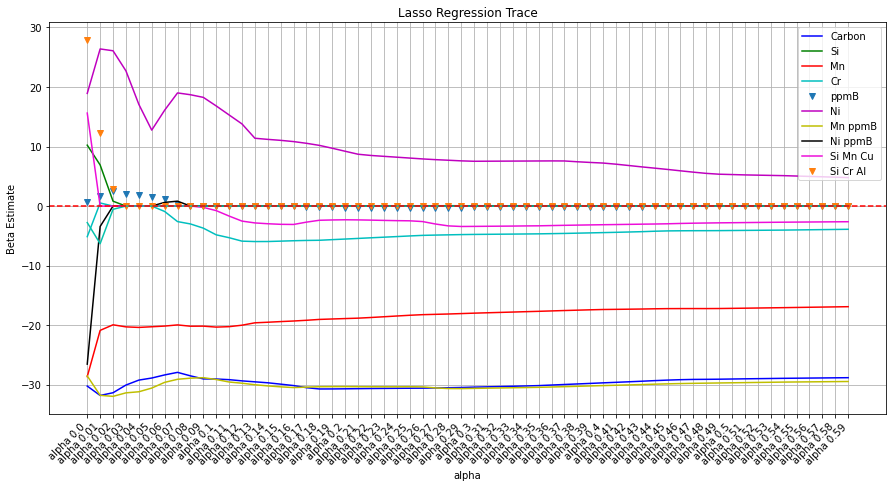

In [35]:
y_val=y_val.reset_index(drop=True)
y_val = pd.DataFrame(y_val)
x_val = features


lasso_df = pd.DataFrame({'variable': x_test.columns})
lasso_val_pred = {}

#alphas = np.arange(0, 0.001, 0.0001)
#alphas = np.arange(0.00001, 0.1, 0.00001)
alphas = np.arange(0, 1, 0.01)

for n, alpha in enumerate(alphas):
    if (n<60):
        lasso_reg = Lasso(alpha=alpha)
        lasso_reg.fit(x_val, y_val)
        var_name = 'alpha ' + str(round(alpha,5))
        lasso_df[var_name] = lasso_reg.coef_.reshape(-1)
        lasso_val_pred['alpha '+str(round(alpha,3))]=lasso_reg.predict(x_val)
    else:
        pass

lasso_df =lasso_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(lasso_df.C,'b', lasso_df.Si, 'g', lasso_df.Mn, 'r', lasso_df.Cr, 'c', lasso_df.Mo, 'v',
        lasso_df.Al, 'm', lasso_df.Ni, 'y',lasso_df["Mn ppmB"],'k', lasso_df["Ni ppmB"],'#ED0DD9', 
        lasso_df["Si Mn Cu"], 'v', lasso_df["Si Cr Al"], '#06C2AC')
    
ax.set_xlabel("alpha")
ax.axhline(y=0, color='red', linestyle='--')

#ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])

fig.autofmt_xdate(rotation=45)
ax.grid(True)

In [36]:
model = sm.OLS(y_val, x_val)

results_fu = model.fit()
results_fr = model.fit_regularized(L1_wt=1, alpha=0.059, start_params=results_fu.params, refit=False)
results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final_lasso = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)

final_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     14.44
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           4.66e-27
Time:                        12:39:11   Log-Likelihood:                -689.31
No. Observations:                 190   AIC:                             1605.
Df Residuals:                      77   BIC:                             1972.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            774.3660     52.649     14.708      0.000     669.528     879.204
C              3.3772    100.732      0.034      0.973    -197.206     203.960
Si           411.2428    330.626      1.244      0.217    -247.117    1069.603
Mn           -87.5221    219.279     -0.399      0.691    -524.162     349.118
Cr          -114.5316    158.537     -0.722      0.472    -430.219     201.156
Mo          -228.5769    124.358     -1.838      0.070    -476.206      19.052
Ni          -485.8804    264.784     -1.835      0.070   -1013.132      41.371
Al           968.3814    517.403      1.872      0.065     -61.900    1998.663
Cu          -303.5190    158.036     -1.921      0.058    -618.210      11.172
ppmB        -412.5470    201.554     -2.047      0.044    -813.893     -11.201
C Si        1174.8770    578.903      2.029      0.046      22.134    2327.620
C Mn        -272.0061    287.324     -0.947      0.347    -844.141     300.128
C Cr         249.4639    130.769      1.908      0.060     -10.931     509.858
C Mo        -324.6916    164.093     -1.979      0.051    -651.442       2.059
C Ni        -589.3504    341.657     -1.725      0.089   -1269.676      90.975
C Al         176.9827    280.717      0.630      0.530    -381.997     735.963
C Cu        -628.7251    431.902     -1.456      0.150   -1488.752     231.301
C ppmB       -35.1171    301.564     -0.116      0.908    -635.608     565.374
Si Mn       -147.4560    175.930     -0.838      0.405    -497.777     202.865
Si Cr       -540.7588    335.927     -1.610      0.112   -1209.675     128.158
Si Mo        162.5426    189.642      0.857      0.394    -215.084     540.169
Si Ni       -963.0164    464.280     -2.074      0.041   -1887.516     -38.517
Si Al       1982.4187    932.141      2.127      0.037     126.288    3838.550
Si Cu       -294.6060    181.837     -1.620      0.109    -656.690      67.478
Si ppmB      240.7456    575.154      0.419      0.677    -904.533    1386.024
Mn Cr       -381.5960    219.524     -1.738      0.086    -818.725      55.533
Mn Mo        -54.0431    117.790     -0.459      0.648    -288.593     180.507
Mn Ni        617.5884    301.205      2.050      0.044      17.813    1217.364
Mn Al        496.2899    645.173      0.769      0.444    -788.415    1780.994
Mn Cu        702.5093    446.313      1.574      0.120    -186.213    1591.232
Mn ppmB     -612.0148    717.328     -0.853      0.396   -2040.398     816.368
Cr Mo         -2.9468     79.664     -0.037      0.971    -161.579     155.685
Cr Ni        -40.1951     68.594     -0.586      0.560    -176.782      96.392
Cr Al         -5.1585    379.190     -0.014      0.989    -760.221     749.904
Cr Cu        -52.9161     93.003     -0.569      0.571    -238.108     132.276
Cr ppmB     -630.4771    543.714     -1.160      0.250   -1713.150     452.196
Mo

# <h1><center>ELASTIC_NET REGULARIZATION !</center></h1>.

   <h1><center> TRAINING</center></h1>.


In [37]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_train = pd.DataFrame(y_train)
x_train = features

X_train1=X_train1.reset_index(drop=True)
y_train1=y_train1.reset_index(drop=True)
y_train1 = pd.DataFrame(y_train1)

### Model 


In [38]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_train)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_train), columns=interaction.get_feature_names(X_train.columns))
features = pd.DataFrame(features)

frames = [features, X_train1]
features = pd.concat(frames, axis=1)

features


,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.597484,-0.029253,0.115940,-0.903665,-0.800529,1.098747,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,0.097316,0.081745,0.185095,-0.033318,-0.924123,-0.265243,-1.454493
1,1.0,-0.323727,0.050170,1.671702,-0.858767,-0.800529,-0.539713,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,-0.047802,-0.040154,-0.090920,-0.033318,-0.162726,1.645089,1.906627
2,1.0,0.860687,2.631427,1.546525,0.473205,1.261079,0.764793,-0.197778,-0.447825,-0.376174,...,0.111694,0.093823,0.212442,0.067738,0.056900,0.128837,-0.033318,-0.466090,-0.262911,-0.804694
3,1.0,-0.718532,0.189161,1.296173,-0.843801,-0.760105,-0.497969,-0.041002,-0.401857,0.854642,...,-0.012524,0.026635,0.261053,-0.008205,0.017450,0.171024,0.014082,1.896272,0.272427,1.375696
4,1.0,-1.179138,-0.446225,-0.813941,-0.903665,1.018537,-0.539713,-0.197778,-0.447825,-0.376174,...,0.090212,0.075778,0.171583,-0.047802,-0.040154,-0.090920,-0.033318,0.243790,-0.265154,-1.398535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,1.0,0.597484,-0.009397,0.115940,-0.903665,0.816418,1.098747,-0.197778,-0.447825,-0.376174,...,0.072310,0.060741,0.137534,0.097316,0.081745,0.185095,-0.033318,-0.924123,-0.263269,-0.858842
950,1.0,0.531683,2.194599,0.205351,1.251435,-0.598410,-0.372736,-0.197778,0.379596,-0.376174,...,0.044926,-0.044521,0.085450,0.027983,-0.027731,0.053225,0.028242,0.138485,-0.262013,-0.693771
951,1.0,-1.376540,-0.505793,0.706056,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,5.281904,...,-0.005076,0.155859,0.653890,-0.003807,0.116884,0.490374,0.037253,0.011068,0.451860,1.496253
952,1.0,-0.915935,-0.466081,-1.171587,0.069123,1.503621,-0.539713,-0.197778,-0.447825,-0.376174,...,0.133175,0.111868,0.253300,-0.047802,-0.040154,-0.090920,-0.033318,0.052783,-0.116942,0.837223


<ipython-input-39-0061bfa16802>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(x_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104659.59224879753, tolerance: 216.0140603773585
  model = cd_fast.enet_coordinate_descent(
<ipython-input-39-0061bfa16802>:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic_reg.fit(x_train, y_train)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordina

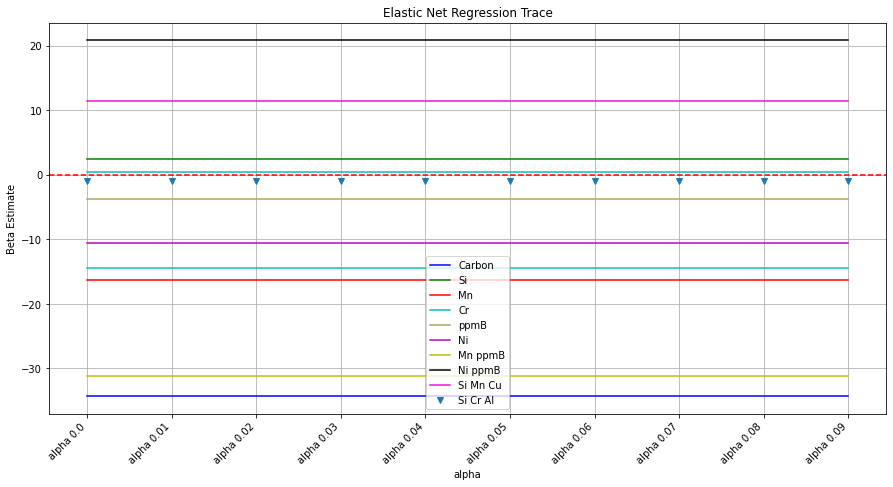

In [39]:
y_train=y_train.reset_index(drop=True)
y_train = pd.DataFrame(y_train)
x_train = features

elastic = linear_model.ElasticNet(alpha=0)
elastic.fit(x_train, y_train)
elastic_df = pd.DataFrame({'variable': x_train.columns})
elastic_train_pred = {}
elastic_test_pred = {}
elastic_val_pred = {}

alphas = np.arange(0, 0.1, 0.01)

for n, alpha in enumerate(alphas):
    if (n<60):
        elastic_reg =linear_model.ElasticNet(alpha=alpha)
        elastic_reg.fit(x_train, y_train)
        var_name = 'alpha ' + str(round(alpha,5))
        elastic_df[var_name] = elastic.coef_.reshape(-1)
        elastic_train_pred['alpha '+str(round(alpha,3))]=elastic_reg.predict(x_train)
        elastic_test_pred['alpha '+str(round(alpha,3))]=elastic_reg.predict(x_test)

    else:
        pass

elastic_df =elastic_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(elastic_df.C,'b', elastic_df.Si, 'g', elastic_df.Mn, 'r', elastic_df.Cr, 'c',  elastic_df.Mo, '#AAA662',
        elastic_df.ppmB, 'm', elastic_df.Ni, 'y', elastic_df["Mn ppmB"],'k', elastic_df["Ni ppmB"],'#ED0DD9',
        elastic_df["Si Mn Cu"], 'v', elastic_df["Si Cr Al"], '#06C2AC' )
   
ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')

ax.set_ylabel("Beta Estimate")
ax.set_title("Elastic Net Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])
fig.autofmt_xdate(rotation=45)
ax.grid(True)


### ElasticNet Alpha Value Test Using RMSE

In [40]:
def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(elastic_test_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in elastic_test_pred.keys():
    predicted = elastic_test_pred[alpha ] 
    observed = y_test.values
    RMSE( predicted, observed)
    #my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
#df1

In [41]:
model = sm.OLS(y_train, x_train)

results_fu = model.fit()
results_fr=model.fit_regularized(method='elastic_net', L1_wt=0.5, alpha = 0.009,
                                 start_params=results_fu.params, refit=True)

results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final1 = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     58.30
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:39:17   Log-Likelihood:                -3922.7
No. Observations:                 954   AIC:                             8111.
Df Residuals:                     821   BIC:                             8758.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            652.6145     31.380     20.797      0.000     591.020     714.209
C            -66.8516     24.928     -2.682      0.007    -115.783     -17.921
Si          -120.3596     60.371     -1.994      0.047    -238.859      -1.860
Mn             3.2478     10.157      0.320      0.749     -16.688      23.184
Cr             2.5395      7.409      0.343      0.732     -12.003      17.081
Mo            31.3220     12.646      2.477      0.013       6.500      56.144
Ni          -101.5992     52.406     -1.939      0.053    -204.464       1.265
Al            63.1199     89.350      0.706      0.480    -112.262     238.502
Cu           -85.9664     36.835     -2.334      0.020    -158.268     -13.665
ppmB        -225.6279     77.999     -2.893      0.004    -378.728     -72.528
C Si          -3.7933     19.024     -0.199      0.842     -41.135      33.548
C Mn           4.7311      5.550      0.852      0.394      -6.163      15.625
C Cr          12.3905      6.370      1.945      0.052      -0.112      24.893
C Mo           0.0210      4.035      0.005      0.996      -7.899       7.941
C Ni         -59.2799     38.531     -1.539      0.124    -134.910      16.351
C Al         -46.7889     37.459     -1.249      0.212    -120.316      26.738
C Cu           3.2415     21.187      0.153      0.878     -38.346      44.829
C ppmB       -95.1873     65.671     -1.449      0.148    -224.090      33.716
Si Mn         37.7140     10.219      3.690      0.000      17.655      57.773
Si Cr          1.4233     14.160      0.101      0.920     -26.370      29.217
Si Mo         47.6698     16.044      2.971      0.003      16.177      79.162
Si Ni         19.0790     52.111      0.366      0.714     -83.208     121.366
Si Al               0     99.590          0      1.000    -195.481     195.481
Si Cu       -240.7359    132.601     -1.815      0.070    -501.013      19.541
Si ppmB     -324.5924    156.896     -2.069      0.039    -632.556     -16.629
Mn Cr         -7.1932      3.229     -2.228      0.026     -13.531      -0.856
Mn Mo         -8.8458      3.201     -2.763      0.006     -15.129      -2.562
Mn Ni         21.7886     15.252      1.429      0.154      -8.150      51.727
Mn Al         63.2811     33.755      1.875      0.061      -2.976     129.538
Mn Cu         -1.1840     14.718     -0.080      0.936     -30.074      27.706
Mn ppmB       45.9109     23.855      1.925      0.055      -0.913      92.735
Cr Mo         -2.2358      2.563     -0.872      0.383      -7.266       2.794
Cr Ni        -23.7236     12.248     -1.937      0.053     -47.764       0.317
Cr Al        -22.0361     23.695     -0.930      0.353     -68.546      24.474
Cr Cu         11.4655     11.745      0.976      0.329     -11.587      34.518
Cr ppmB       39.6712     16.031      2.475      0.014       8.204      71.138
Mo

##   <h1><center> TESTING </center></h1>.


In [42]:
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test)

X_test1=X_test1.reset_index(drop=True)
y_test1=y_test1.reset_index(drop=True)
y_test1 = pd.DataFrame(y_test1)


### Model 


In [43]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_test)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_test), columns=interaction.get_feature_names(X_test.columns))
feature = pd.DataFrame(interaction.transform(X_test), columns=interaction.get_feature_names(X_test.columns))

features = pd.DataFrame(features)
frames = [features, X_test1]
features = pd.concat(frames, axis=1)

features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.663284,-0.287379,-0.420530,-0.005706,-0.800529,-0.539713,-0.197778,-0.447825,-0.376174,...,-0.070903,-0.059558,-0.134857,-0.047802,-0.040154,-0.090920,-0.033318,-0.920059,-0.250978,-0.127706
1,1.0,-0.521130,0.308296,0.580880,-0.724073,-0.800529,-0.539713,-0.197778,0.517500,-0.376174,...,0.081934,-0.059558,0.155839,0.055240,-0.040154,0.105066,0.038501,-0.162726,0.631293,1.589764
2,1.0,-0.389528,-0.386658,-0.599353,0.727626,0.371758,-0.153579,-0.197778,0.425564,-0.376174,...,-0.031290,0.027658,-0.059513,0.012926,-0.011426,0.024586,0.031661,-0.251895,-0.260040,-0.520620
3,1.0,1.321292,-0.227811,-0.116530,-0.903665,1.139808,-0.539713,-0.197778,-0.447825,-0.376174,...,0.100953,0.084800,0.192012,-0.047802,-0.040154,-0.090920,-0.033318,-1.137362,-0.250978,-0.127706
4,1.0,-1.047536,-0.366802,-0.831823,0.039192,0.129216,3.269445,-0.197778,-0.447825,-0.376174,...,0.011445,0.009614,0.021768,0.289574,0.243243,0.550771,-0.033318,-0.594942,-0.250978,-0.127706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.0,-1.376540,-0.505793,0.706056,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,4.234792,...,-0.005076,0.124961,0.524259,-0.003807,0.093712,0.393160,0.029868,0.011068,0.003278,1.085223
124,1.0,0.794886,-0.108676,-0.116530,-0.903665,1.058960,-0.539713,-0.197778,-0.447825,-0.376174,...,0.093792,0.078785,0.178393,-0.047802,-0.040154,-0.090920,-0.033318,-1.137362,-0.250978,-0.127706
125,1.0,-0.060524,-0.088820,0.205351,2.209258,0.897266,0.837846,0.063516,0.655403,-0.376174,...,0.037352,-0.021438,-0.221217,0.034878,-0.020019,-0.206567,-0.015660,-0.426287,-0.260129,-0.527117
126,1.0,1.452894,-0.068965,-0.134413,0.982048,0.856842,-0.414480,-0.197778,0.517500,-0.376174,...,-0.087698,0.063748,-0.166801,0.042422,-0.030837,0.080687,0.038501,1.682196,-0.262283,-0.724078


<ipython-input-44-b35a9992d37a>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(x_test, y_test)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3907.3600088388425, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
<ipython-input-44-b35a9992d37a>:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic_reg.fit(x_test, y_test)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descen

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8573.632862231416, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8621.463218477043, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8656.755721328645, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: 

/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8584.91951463969, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8554.19325958486, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8545.96903419517, tolerance: 28.445321875
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Obj

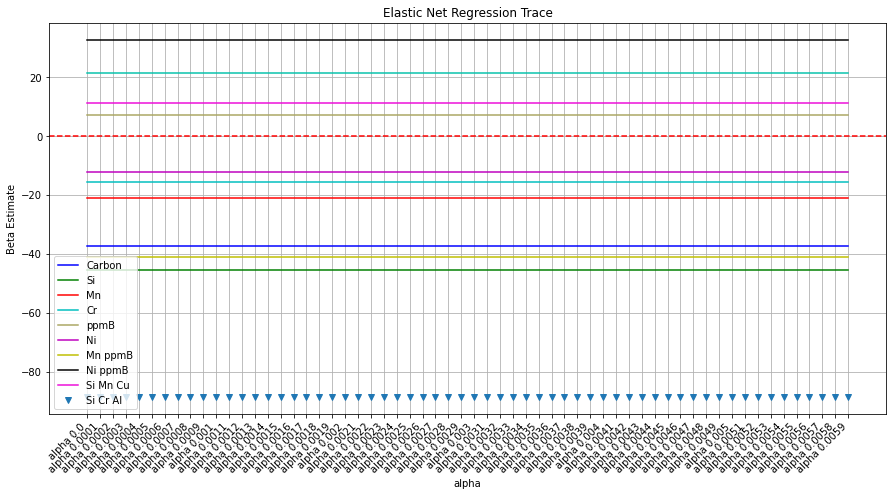

In [44]:
y_test=y_test.reset_index(drop=True)
y_test = pd.DataFrame(y_test)
x_test = features


elastic = linear_model.ElasticNet(alpha=0)
elastic.fit(x_test, y_test)
elastic_df = pd.DataFrame({'variable': x_test.columns})
elastic_test_pred = {}
elastic_val_pred = {}


alphas = np.arange(0, 1, 0.0001)
#alphas = np.arange(0.0001, 1, 0.0001)
#alphas = np.arange(0.00001, 0.01, 0.00001)

for n, alpha in enumerate(alphas):
    if (n<60):
        elastic_reg =linear_model.ElasticNet(alpha=alpha)
        elastic_reg.fit(x_test, y_test)
        var_name = 'alpha ' + str(round(alpha,5))
        elastic_df[var_name] = elastic.coef_.reshape(-1)
        # prediction
        elastic_test_pred['alpha '+str(round(alpha,3))]=elastic_reg.predict(x_test)
        elastic_val_pred['alpha '+str(round(alpha,3))]=elastic_reg.predict(x_val)

    else:
        pass

elastic_df =elastic_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(elastic_df.C,'b', elastic_df.Si, 'g', elastic_df.Mn, 'r', elastic_df.Cr, 'c',  elastic_df.Mo, '#AAA662',
        elastic_df.ppmB, 'm', elastic_df.Ni, 'y', elastic_df["Mn ppmB"],'k', elastic_df["Ni ppmB"],'#ED0DD9',
        elastic_df["Si Mn Cu"], 'v', elastic_df["Si Cr Al"], '#06C2AC' )
   
ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')

ax.set_ylabel("Beta Estimate")
ax.set_title("Elastic Net Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])
fig.autofmt_xdate(rotation=45)
ax.grid(True)


In [45]:
def RMSE(x,y):
    a = np.sum((x-y)**2)
    b=len(elastic_val_pred[alpha])
    return np.sqrt(a/b)

ds ={}
dz = {}
dc ={}

for alpha in elastic_val_pred.keys():
    predicted = elastic_val_pred[alpha ] 
    observed = y_val.values
    RMSE( predicted, observed)
    #my_rho = np.corrcoef(observed, predicted)
    rms=RMSE(observed, predicted)
    ds[alpha]=my_rho,rms
    dz[alpha]=rms
    dc[alpha]=my_rho

df1 = pd.DataFrame(list(dz.items()),columns = ['ALPHA','RMSE'])
df2 = pd.DataFrame(list(ds.items()),columns = ['ALPHA','RMSE'])
df3 = pd.DataFrame(list(dc.items()),columns = ['ALPHA','PEARSON_CORRELATION'])
#df1

### Performance Criteria

In [46]:
model = sm.OLS(y_test, x_test)

results_fu = model.fit()
results_fr=model.fit_regularized(method='elastic_net', L1_wt=0.5, alpha = 0.0001,
                                 start_params=results_fu.params, refit=False)

results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     8.108
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.46e-07
Time:                        12:39:27   Log-Likelihood:                -445.84
No. Observations:                 128   AIC:                             1100.
Df Residuals:                      24   BIC:                             1396.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            449.1927   2011.732      0.223      0.825   -3702.817    4601.203
C          -1986.6607   1.48e+04     -0.134      0.894   -3.25e+04    2.85e+04
Si          1123.7697   8335.763      0.135      0.894   -1.61e+04    1.83e+04
Mn          -382.0596   2966.945     -0.129      0.899   -6505.533    5741.414
Cr           618.3436   4116.299      0.150      0.882   -7877.279    9113.966
Mo          -454.5070   2807.833     -0.162      0.873   -6249.589    5340.575
Ni          -235.2088   1602.839     -0.147      0.885   -3543.305    3072.888
Al         -1016.6236   7969.752     -0.128      0.900   -1.75e+04    1.54e+04
Cu           301.6157    844.061      0.357      0.724   -1440.441    2043.673
ppmB        -490.3224   2673.180     -0.183      0.856   -6007.496    5026.851
C Si       -3512.1117   2.77e+04     -0.127      0.900   -6.08e+04    5.37e+04
C Mn         133.0888    763.786      0.174      0.863   -1443.288    1709.466
C Cr       -1099.3209   7650.724     -0.144      0.887   -1.69e+04    1.47e+04
C Mo         273.5864   2377.737      0.115      0.909   -4633.822    5180.995
C Ni        1362.9608   9089.030      0.150      0.882   -1.74e+04    2.01e+04
C Al       -1985.4982   1.49e+04     -0.133      0.895   -3.27e+04    2.88e+04
C Cu       -1873.4776    1.5e+04     -0.125      0.902   -3.28e+04    2.91e+04
C ppmB     -4402.1386   3.21e+04     -0.137      0.892   -7.06e+04    6.18e+04
Si Mn      -3248.2611   2.41e+04     -0.135      0.894    -5.3e+04    4.65e+04
Si Cr       1856.1524   1.22e+04      0.152      0.880   -2.33e+04     2.7e+04
Si Mo      -1403.7809   9205.543     -0.152      0.880   -2.04e+04    1.76e+04
Si Ni       -846.4089   5747.446     -0.147      0.884   -1.27e+04     1.1e+04
Si Al       -970.5400   8432.711     -0.115      0.909   -1.84e+04    1.64e+04
Si Cu       1386.7730   8698.467      0.159      0.875   -1.66e+04    1.93e+04
Si ppmB     3390.1339   2.65e+04      0.128      0.899   -5.12e+04     5.8e+04
Mn Cr         15.5951    629.083      0.025      0.980   -1282.768    1313.958
Mn Mo        486.1234   4548.461      0.107      0.916   -8901.438    9873.685
Mn Ni      -1393.6272   9593.471     -0.145      0.886   -2.12e+04    1.84e+04
Mn Al      -1794.9507    1.5e+04     -0.119      0.906   -3.28e+04    2.92e+04
Mn Cu       1631.6044   1.07e+04      0.152      0.880   -2.05e+04    2.38e+04
Mn ppmB      457.1154   1958.722      0.233      0.817   -3585.489    4499.719
Cr Mo        478.2578   3701.217      0.129      0.898   -7160.678    8117.193
Cr Ni         87.9044    209.478      0.420      0.678    -344.437     520.245
Cr Al        807.9806   7028.723      0.115      0.909   -1.37e+04    1.53e+04
Cr Cu        433.6532   2679.957      0.162      0.873   -5097.505    5964.812
Cr ppmB      706.0322   4857.487      0.145      0.886   -9319.328    1.07e+04
Mo

   <h1><center> VALIDATION </center></h1>.


In [47]:
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)
y_val = pd.DataFrame(y_val)

X_val1=X_val1.reset_index(drop=True)
y_val1=y_val1.reset_index(drop=True)
y_val1 = pd.DataFrame(y_val1)


### Model 


In [48]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(X_val)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(X_val), columns=interaction.get_feature_names(X_val.columns))
feature = pd.DataFrame(interaction.transform(X_val), columns=interaction.get_feature_names(X_val.columns))

features = pd.DataFrame(features)
frames = [features, X_val1]
features = pd.concat(frames, axis=1)

features

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Pa,Rc,lnRc
0,1.0,0.597484,-0.128532,-0.027119,-0.903665,0.816418,0.316043,-0.197778,-0.447825,-0.376174,...,0.072310,0.060741,0.137534,0.027992,0.023513,0.053241,-0.033318,-0.924123,-0.239046,0.118895
1,1.0,-1.376540,-0.525649,0.670292,-0.305026,-0.719681,-0.539713,-0.041002,-0.172018,0.652567,...,-0.005076,0.019256,0.080787,-0.003807,0.014441,0.060585,0.004603,0.011068,-0.176155,0.624835
2,1.0,-1.310739,-0.485937,-0.563588,0.847354,-0.719681,-0.289248,-0.041002,0.333628,1.130197,...,0.009845,0.033350,-0.271367,0.003957,0.013404,-0.109065,-0.015460,-0.162726,0.631293,1.589764
3,1.0,0.400081,-0.307235,-0.599353,0.952116,0.735571,-0.539713,-0.197778,-0.447825,-0.376174,...,0.065149,0.054726,0.123914,-0.047802,-0.040154,-0.090920,-0.033318,-0.703234,-0.264436,-1.108062
4,1.0,0.465882,0.070026,-0.027119,-0.275094,2.554636,-0.539713,-0.197778,-0.447825,-0.376174,...,0.226264,0.190062,0.430354,-0.047802,-0.040154,-0.090920,-0.033318,-0.694987,-0.254029,-0.223749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.0,-1.113337,-0.327090,-0.384765,-0.469652,0.856842,-0.539713,-0.197778,-0.447825,2.140568,...,0.075890,-0.362750,-0.821369,-0.047802,0.228491,0.517369,0.189590,0.187970,-0.262641,-0.768231
186,1.0,0.860687,2.651283,1.582290,0.473205,-0.557987,0.796102,-0.197778,-0.447825,-0.376174,...,-0.049421,-0.041514,-0.093999,0.070511,0.059229,0.134111,-0.033318,-0.580598,-0.263000,-0.817589
187,1.0,0.005276,-0.207955,1.474996,-0.454686,0.533453,-0.414480,-0.041002,0.747339,2.379383,...,-0.016346,-0.052043,0.948589,0.012701,0.040436,-0.737031,-0.072909,-0.140733,-0.264346,-1.082656
188,1.0,-0.915935,-0.505793,-1.028529,1.535789,-0.557987,1.265724,-0.197778,0.563468,-0.376174,...,0.062183,-0.041514,0.118272,-0.141054,0.094168,-0.268285,0.041921,-0.539361,-0.260488,-0.554163


<ipython-input-49-15fa4fd90d1c>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(x_val, y_val)
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9346.875156113076, tolerance: 34.665597894736834
  model = cd_fast.enet_coordinate_descent(
/home/dave/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778.8830530610394, tolerance: 34.665597894736834
  model = cd_f

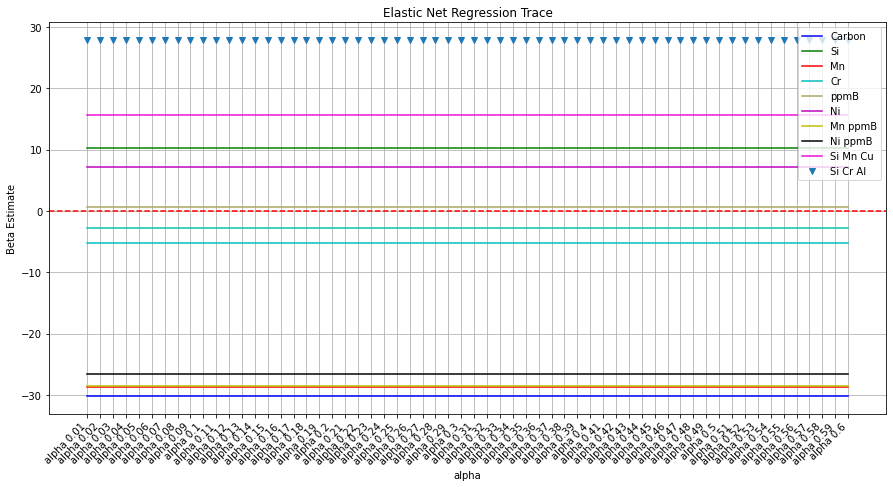

In [49]:
y_val=y_val.reset_index(drop=True)
y_val = pd.DataFrame(y_val)
x_val = features


elastic = linear_model.ElasticNet(alpha=0)
elastic.fit(x_val, y_val)
elastic_df = pd.DataFrame({'variable': x_val.columns})
elastic_val_pred = {}


alphas = np.arange(0.01, 1, 0.01)
#alphas = np.arange(0.0001, 1, 0.0001)
#alphas = np.arange(0.00001, 0.01, 0.00001)

for n, alpha in enumerate(alphas):
    if (n<60):
        elastic_reg =linear_model.ElasticNet(alpha=alpha)
        elastic_reg.fit(x_val, y_val)
        var_name = 'alpha ' + str(round(alpha,5))
        elastic_df[var_name] = elastic.coef_.reshape(-1)
        # prediction
        elastic_val_pred['alpha '+str(round(alpha,3))]=elastic_reg.predict(x_val)
    else:
        pass

elastic_df =elastic_df.set_index('variable').T

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(elastic_df.C,'b', elastic_df.Si, 'g', elastic_df.Mn, 'r', elastic_df.Cr, 'c',  elastic_df.Mo, '#AAA662',
        elastic_df.ppmB, 'm', elastic_df.Ni, 'y', elastic_df["Mn ppmB"],'k', elastic_df["Ni ppmB"],'#ED0DD9',
        elastic_df["Si Mn Cu"], 'v', elastic_df["Si Cr Al"], '#06C2AC' )
   
ax.set_xlabel("alpha")

ax.axhline(y=0, color='red', linestyle='--')

ax.set_ylabel("Beta Estimate")
ax.set_title("Elastic Net Regression Trace", fontsize=12)
ax.legend(labels=['Carbon','Si','Mn','Cr','ppmB', 'Ni', 'Mn ppmB', 'Ni ppmB', 'Si Mn Cu', 'Si Cr Al'])
fig.autofmt_xdate(rotation=45)
ax.grid(True)


### Performance Criteria

In [50]:
model = sm.OLS(y_val, x_val)

results_fu = model.fit()
results_fr=model.fit_regularized(method='elastic_net', L1_wt=0.5, alpha = 0.0001,
                                 start_params=results_fu.params, refit=True)

results_fr_fit = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final = sm.regression.linear_model.OLSResults(model, results_fr.params, model.normalized_cov_params)
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Texp   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     16.47
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           4.89e-29
Time:                        12:39:34   Log-Likelihood:                -677.33
No. Observations:                 190   AIC:                             1581.
Df Residuals:                      77   BIC:                             1948.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            776.2428     49.430     15.704      0.000     677.815     874.671
C              2.1076     94.573      0.022      0.982    -186.212     190.427
Si           415.9020    310.411      1.340      0.184    -202.206    1034.010
Mn           -90.0636    205.872     -0.437      0.663    -500.008     319.880
Cr          -120.3949    148.844     -0.809      0.421    -416.782     175.992
Mo          -233.7595    116.755     -2.002      0.049    -466.248      -1.271
Ni          -483.7509    248.595     -1.946      0.055    -978.767      11.265
Al           978.8301    485.769      2.015      0.047      11.540    1946.121
Cu          -295.8213    148.374     -1.994      0.050    -591.272      -0.371
ppmB        -413.3080    189.231     -2.184      0.032    -790.116     -36.500
C Si        1180.9361    543.509      2.173      0.033      98.672    2263.201
C Mn        -273.5147    269.757     -1.014      0.314    -810.669     263.640
C Cr         251.9395    122.774      2.052      0.044       7.466     496.413
C Mo        -325.7683    154.060     -2.115      0.038    -632.541     -18.995
C Ni        -595.7580    320.768     -1.857      0.067   -1234.488      42.972
C Al         169.3304    263.554      0.642      0.522    -355.474     694.134
C Cu        -634.3554    405.495     -1.564      0.122   -1441.800     173.089
C ppmB       -34.7657    283.127     -0.123      0.903    -598.543     529.012
Si Mn       -154.8900    165.173     -0.938      0.351    -483.792     174.012
Si Cr       -548.8789    315.389     -1.740      0.086   -1176.898      79.140
Si Mo        178.3133    178.048      1.001      0.320    -176.225     532.852
Si Ni       -975.0751    435.894     -2.237      0.028   -1843.051    -107.099
Si Al       1986.2889    875.150      2.270      0.026     243.642    3728.936
Si Cu       -295.2345    170.720     -1.729      0.088    -635.181      44.712
Si ppmB      248.7609    539.989      0.461      0.646    -826.495    1324.017
Mn Cr       -386.0055    206.103     -1.873      0.065    -796.408      24.397
Mn Mo        -60.0352    110.588     -0.543      0.589    -280.245     160.174
Mn Ni        629.7095    282.789      2.227      0.029      66.604    1192.815
Mn Al        503.1046    605.728      0.831      0.409    -703.053    1709.262
Mn Cu        715.0390    419.025      1.706      0.092    -119.347    1549.425
Mn ppmB     -617.6729    673.471     -0.917      0.362   -1958.725     723.379
Cr Mo         -7.5263     74.794     -0.101      0.920    -156.459     141.407
Cr Ni        -36.6839     64.400     -0.570      0.571    -164.920      91.552
Cr Al         -6.2522    356.006     -0.018      0.986    -715.151     702.646
Cr Cu        -54.4271     87.317     -0.623      0.535    -228.297     119.443
Cr ppmB     -641.1436    510.471     -1.256      0.213   -1657.622     375.335
Mo

## The Stopping Criterion

In [51]:
tval=final.tvalues
tv = pd.DataFrame(tval)
#tv


### Elastic Net Stopping Criterion

In [52]:
coff = final1.params
pval=final1.pvalues

data12 = pd.DataFrame(coff)
pv = pd.DataFrame(pval)

data12 = data12.reset_index()
data12 = pd.concat([data12,pv],axis=1)
data12.colums = ['var','coff','pval']
data12 = data12.set_index('index')
inter_data=data12[:-3:]
inter_data


dr = []
for row in range(130):
    if (inter_data.iloc[row,1] > 0.055):
        dr.append(inter_data.index[row])
new_d = inter_data.drop(labels=dr, axis=0)
new_d.colums = ['var','coff','pval']
new_d.set_axis(['Coeff', 'Pval'], axis=1, inplace=True)
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
d


<ipython-input-52-f3d31b65f958>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data12.colums = ['var','coff','pval']
<ipython-input-52-f3d31b65f958>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_d.colums = ['var','coff','pval']


,Coeff,Pval
index,,
1,652.614548,1.695182e-77
C Si Cu,-8.490264,8.767514e-05
Si Mn,37.714001,2.386699e-04
Mn Mo ppmB,-13.118725,1.121183e-03
C Ni Cu,-6.768537,1.598152e-03
Si Mn Ni,-12.109778,1.732473e-03
Si Mo,47.669810,3.053506e-03
C Cr Al,-48.017548,3.055182e-03
ppmB,-225.627911,3.920238e-03


In [53]:
coff = final.params
pval=final.pvalues

data12 = pd.DataFrame(coff)
pv = pd.DataFrame(pval)

data12 = data12.reset_index()
data12 = pd.concat([data12,pv],axis=1)
data12.colums = ['var','coff','pval']
data12 = data12.set_index('index')
inter_data=data12[:-3:]
inter_data


dr = []
for row in range(130):
    if (inter_data.iloc[row,1] > 0.055):
        dr.append(inter_data.index[row])
new_d = inter_data.drop(labels=dr, axis=0)
new_d.colums = ['var','coff','pval']
new_d.set_axis(['Coeff', 'Pval'], axis=1, inplace=True)
d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
d


<ipython-input-53-52c20a120c9a>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data12.colums = ['var','coff','pval']
<ipython-input-53-52c20a120c9a>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_d.colums = ['var','coff','pval']


,Coeff,Pval
index,,
1,776.242797,1.019913e-25
Cr Mo Cu,-125.594005,2.471490e-03
C Ni Cu,155.125395,3.156141e-03
C Mn Ni,35.509915,5.971103e-03
Ni Cu ppmB,1158.254638,1.475874e-02
C Si Cu,71.968115,1.740120e-02
Si Mn Cu,108.815930,2.025890e-02
Mo Al Cu,-1008.579886,2.196447e-02
C Mo Cu,38.601828,2.347166e-02


In [54]:
'''d=new_d.sort_values('Pval', ascending=True)
d = pd.DataFrame(d)
pd.DataFrame(d[:11])
'''

"d=new_d.sort_values('Pval', ascending=True)\nd = pd.DataFrame(d)\npd.DataFrame(d[:11])\n"

 
<h1><center>OBJECTIVE TWO</center></h1>

 
<h1><center>The Johnson-Neyman Technique</center></h1>

In [55]:
interaction = PolynomialFeatures(degree=3, include_bias=True, interaction_only=True)
interaction1=interaction.fit_transform(int_data)
dataset = pd.DataFrame(interaction1)

features = pd.DataFrame(interaction.transform(int_data), columns=interaction.get_feature_names(int_data.columns))
feature = pd.DataFrame(interaction.transform(int_data), columns=interaction.get_feature_names(int_data.columns))

features = pd.DataFrame(features)
frames = [features, y]
features = pd.concat(frames, axis=1)

df = features

<h1><center>Carbon(C) as a focal predictor  </center></h1>

### Conditional Effect of Si on C

*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Si, Range = [0.0, 2.63]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 2.398]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


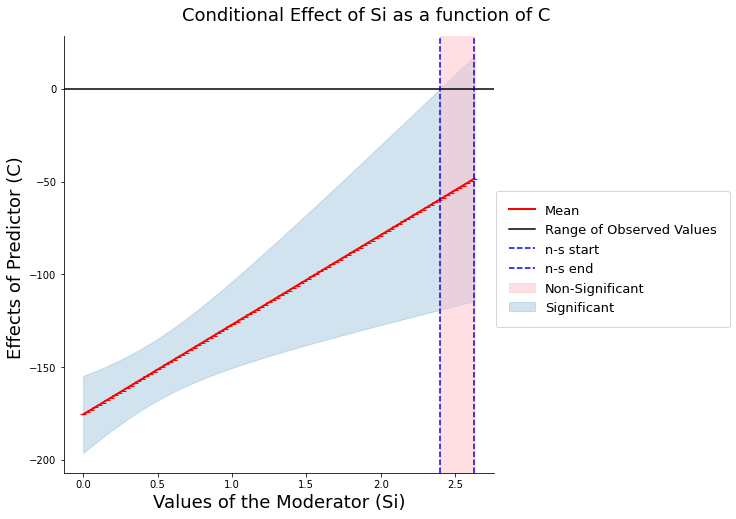

{'Negative on': [0.0, 2.398275239586364], 'Positive on': []}

In [56]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
p = Process(data=df, model=1, x="C",  m= "Si", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Si" 'g'}, x="Si", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))

g.set_axis_labels('Si', 'C')
g.fig.suptitle('Conditional Effect of Si as a function of C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=2.398275239586364, ls='--', c='blue' )
g.map(plt.axvline, x=2.63,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=2.398275239586364, xmax=2.63, ymin=-200, ymax=300, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Si)", 
                  y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Cu on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Cu, Range = [0.0, 2.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 0.816]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


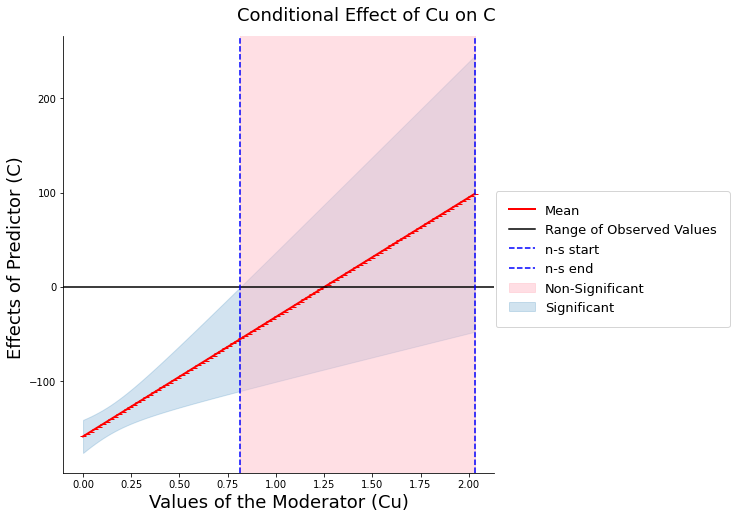

{'Negative on': [0.0, 0.8159584295155945], 'Positive on': []}

In [57]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="C",  m= "Cu", y="Texp", suppr_init=True) 
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()


mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Cu" 'g'}, x="Cu", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))
g.set_axis_labels('Cu', 'C')
g.fig.suptitle('Conditional Effect of Cu on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.8159584295155945, ls='--', c='blue' )
g.map(plt.axvline, x=2.03,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.8159584295155945, xmax=2.03, ymin=-200, ymax=300, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)

g.set_axis_labels(x_var="Values of the Moderator (Cu)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Mn on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Mn, Range = [0.0, 5.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 5.03]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


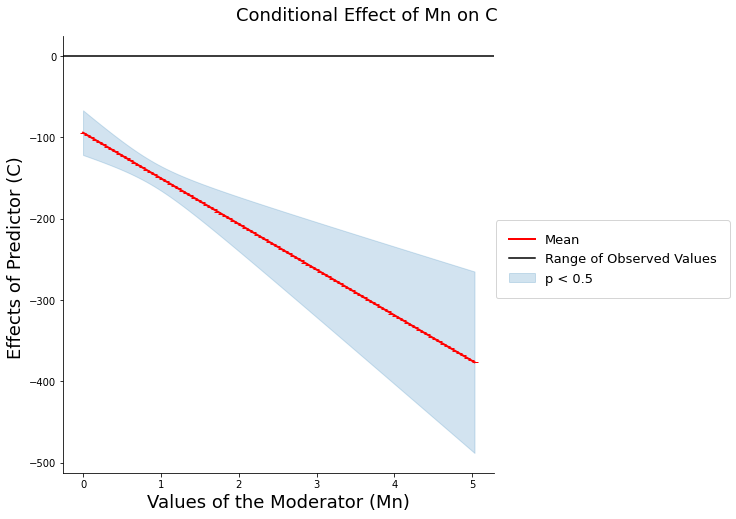

{'Negative on': [0.0, 5.03], 'Positive on': []}

In [58]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="C",  m= "Mn", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model
df_params_direct = direct_model.coeff_summary()


mm=p.floodlight_direct_effect(mod_name="Mn")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Mn")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Mn" 'g'}, x="Mn", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=2, color='red'), 
                                  err_kws = {"alpha": 0.2},
                                  facet_kws=dict(height=7.0))
g.set_axis_labels('Mn', 'C')
g.fig.suptitle('Conditional Effect of Mn on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', "Range of Observed Values",'p < 0.5','','Confidence Interval'], fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Mn)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()



<h1><center> Mn as a focal predictor </center></h1>

### Conditional Effect of C on Mn

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    C, Range = [0.02, 0.86]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.09891, 0.86]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


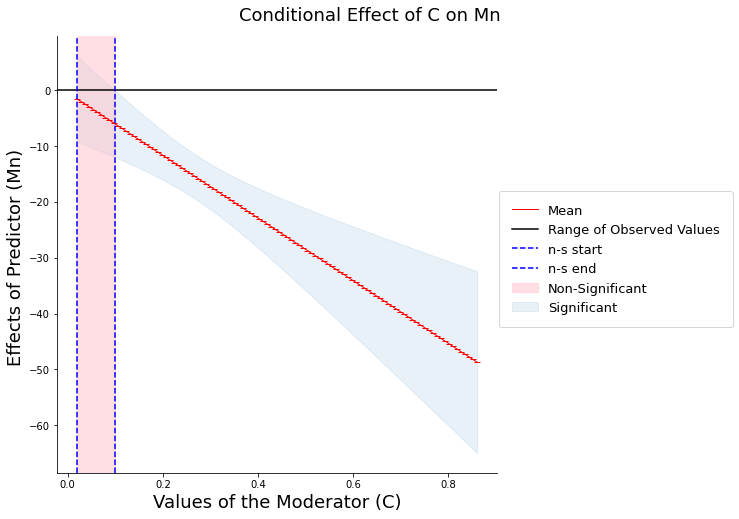

{'Negative on': [0.0989095865469426, 0.86], 'Positive on': []}

In [59]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Mn",  m= "C", y="Texp", suppr_init=True)
#p.summary()
direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="C")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="C")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"C" 'g'}, x="C", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('C', 'Mn')
g.fig.suptitle('Conditional Effect of C on Mn', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.02, ls='--', c='blue' )
g.map(plt.axvline, x=0.09891,    ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.02, xmax=0.0989095865469426, ymin=-70, ymax=10, alpha=0.5, color='pink')
g.add_legend(labels=['Mean', 'Range of Observed Values',"n-s start",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (C)", y_var="Effects of Predictor (Mn) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


### Conditional Effect of Si on Mn

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Si, Range = [0.0, 2.63]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 0.8983]
The direct effect is significantly positive on the interval [2.215, 2.63]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


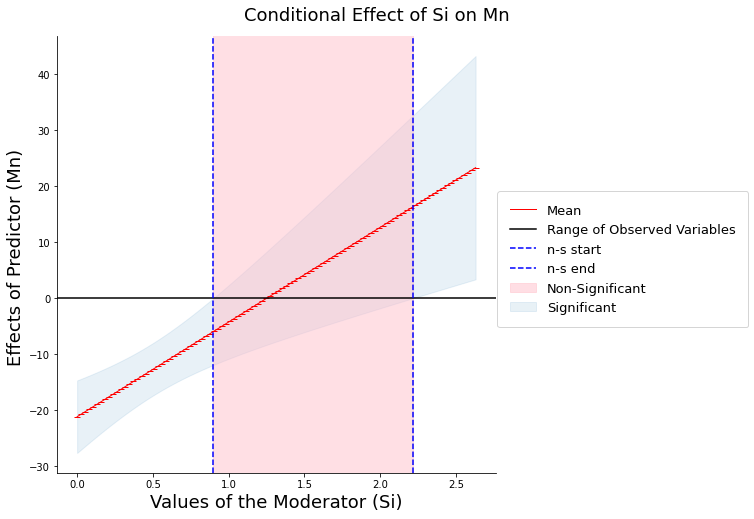

{'Negative on': [0.0, 0.8983175340664658],
 'Positive on': [2.214886462020073, 2.63]}

In [60]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Mn",  m= "Si", y="Texp", suppr_init=True)
#p.summary()

direct_model = p.direct_model
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Si")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Si" 'g'}, x="Si", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('Si', 'Mn')
g.fig.suptitle('Conditional Effect of Si on Mn', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.map(plt.axvline, x=0.8983175340664658,    ls='--', c='blue' )
g.map(plt.axvline, x=2.214886462020073,   ls='--', c='blue' )
g.map(plt.axvspan, xmin=0.8983175340664658, xmax=2.214886462020073, ymin=-30, ymax=40, alpha=0.5, color='pink')

g.add_legend(labels=['Mean', 'Range of Observed Variables',"n-s start",'n-s end','Non-Significant','Significant'], fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Si)", y_var="Effects of Predictor (Mn) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()


<h1><center> JOHNSON NEYMAN 3 - WAY INTERACTION  </center></h1>

### Conditional Effect of Cu on Si, THETA_1

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    Cu, Range = [0.0, 2.03]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [0.0, 2.03]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


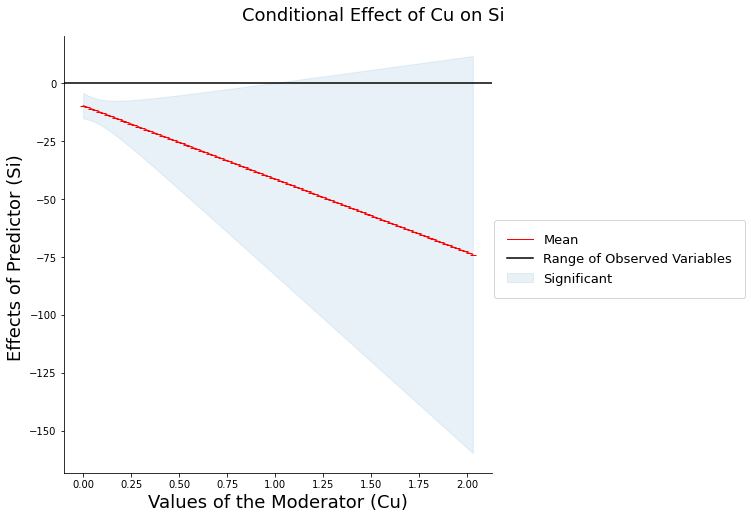

In [61]:
## from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt

p = Process(data=df, model=1, x="Si",  m= "Cu", y="Texp", suppr_init=True)
direct_model = p.direct_model # The model for the direct effect
df_params_direct = direct_model.coeff_summary()

mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct.get_significance_regions()
print(mm)
g= p.plot_conditional_direct_effects(hue= {"Cu" 'g'}, x="Cu", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))


g.set_axis_labels('Cu', 'Si')
g.fig.suptitle('Conditional Effect of Cu on Si', fontsize=18)
g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Variables',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator (Cu)", y_var="Effects of Predictor (Si) ", fontsize=18)
plt.show(g)


In [62]:
from pyprocessmacro import utils as u
from pyprocessmacro import models as m
from pyprocessmacro import Process as p
p = Process(data=df, model=1, x="Si",  m= "Cu", y="Texp", suppr_init=True)

mm=p.floodlight_direct_effect(mod_name="Cu")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="Cu")
a = data["Cu"]
a[:]
floodlight_motiv_direct= p.spotlight_direct_effect({"Cu":a[:]})
effect= floodlight_motiv_direct.Effect
effect = pd.DataFrame(effect)
floodlight_motiv_direct


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Effect,SE,LLCI,ULCI,Cu
0,-27.454610,11.728018,-50.441102,-4.468118,0.563468
1,-27.454610,11.728018,-50.441102,-4.468118,0.563468
2,-27.454610,11.728018,-50.441102,-4.468118,0.563468
3,-27.454610,11.728018,-50.441102,-4.468118,0.563468
4,-27.454610,11.728018,-50.441102,-4.468118,0.563468
...,...,...,...,...,...
1267,3.119184,10.111704,-16.699392,22.937760,-0.401857
1268,3.119184,10.111704,-16.699392,22.937760,-0.401857
1269,3.119184,10.111704,-16.699392,22.937760,-0.401857
1270,3.119184,10.111704,-16.699392,22.937760,-0.401857


In [63]:
'''aa=a[:]
b_si=-50.9506
b_cu=-32.7341
b_add = np.add(b_si, b_cu)
theta_1 = b_add*aa
effect=theta_1
effect = pd.DataFrame(effect)
effect.columns = effect.columns.str.replace('Cu', 'theta_1')

effect'''

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"aa=a[:]\nb_si=-50.9506\nb_cu=-32.7341\nb_add = np.add(b_si, b_cu)\ntheta_1 = b_add*aa\neffect=theta_1\neffect = pd.DataFrame(effect)\neffect.columns = effect.columns.str.replace('Cu', 'theta_1')\n\neffect"

In [64]:
frames = [df, effect]
data = pd.concat(frames, axis=1)

data.columns = data.columns.str.replace('Effect', 'theta_1')
data

,1,C,Si,Mn,Cr,Mo,Ni,Al,Cu,ppmB,...,Mo Ni ppmB,Mo Al Cu,Mo Al ppmB,Mo Cu ppmB,Ni Al Cu,Ni Al ppmB,Ni Cu ppmB,Al Cu ppmB,Texp,theta_1
0,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,770.0,-27.454610
1,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,805.0,-27.454610
2,1.0,0.13,0.27,0.22,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,825.0,-27.454610
3,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,840.0,-27.454610
4,1.0,0.13,0.27,0.21,0.08,0.00,0.06,0.00,0.22,0.0,...,0.0000,0.000000,0.0000,0.0000,0.000000,0.00000,0.0000,0.0000,855.0,-27.454610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0056,0.000005,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,755.0,3.119184
1268,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0056,0.000005,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,775.0,3.119184
1269,1.0,0.20,0.36,0.80,1.12,0.01,0.02,0.05,0.01,28.0,...,0.0056,0.000005,0.0140,0.0028,0.000010,0.02800,0.0056,0.0140,790.0,3.119184
1270,1.0,0.20,0.40,1.78,0.27,0.01,1.15,0.05,0.01,28.0,...,0.3220,0.000005,0.0140,0.0028,0.000575,1.61000,0.3220,0.0140,650.0,3.119184


### Conditional Effect of SiCu (theta_1) on C

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*********************** FLOODLIGHT ANALYSIS OF THE DIRECT EFFECT ***********************

----------------------------------- Analysis Details -----------------------------------

Focal Moderator:
    theta_1, Range = [-291.0, 4.575]


----------------------------------- Analysis Results -----------------------------------

The direct effect is significantly negative on the interval [-291.0, 4.575]


****************************************************************************************



/home/dave/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


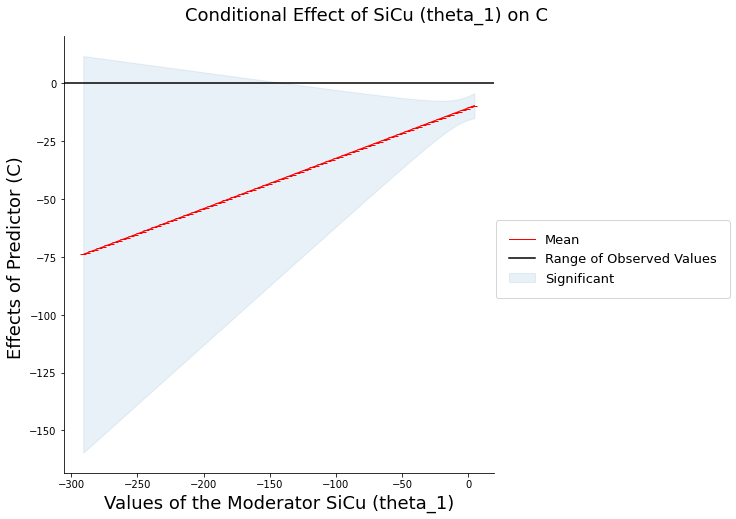

{'Negative on': [-290.9715961088367, 4.5750789639985], 'Positive on': []}

In [65]:
from pyprocessmacro import Process
import pandas as pd
import matplotlib.pyplot as plt
df = data
p = Process(data=df, model=1,  x="Si",  m= "theta_1", y="Texp", suppr_init=True)

direct_model = p.direct_model 
df_params_direct = direct_model.coeff_summary()
mm=p.floodlight_direct_effect(mod_name="theta_1")
floodlight_motiv_direct= p.floodlight_direct_effect(mod_name="theta_1")
floodlight_motiv_direct.get_significance_regions()
#p.summary()
print(mm)

g= p.plot_conditional_direct_effects(x="theta_1", errstyle="band", 
                                  plot_kws=dict(marker="_", linewidth=1, color='red'), 
                                  err_kws = {"alpha": 0.1},
                                  facet_kws=dict(height=7.0))

g.set_axis_labels('theta_1', 'C')
g.fig.suptitle('Conditional Effect of SiCu (theta_1) on C', fontsize=18)

g.map(plt.axhline, y=0,      ls='-',  c='black')
g.add_legend(labels=['Mean', 'Range of Observed Values',"Significant",'n-s end','Non-Significant','Significant'],
             fontsize=13, loc='center right', frameon=True, borderpad=1)
g.set_axis_labels(x_var="Values of the Moderator SiCu (theta_1)", y_var="Effects of Predictor (C) ", fontsize=18)

plt.show(g)
floodlight_motiv_direct.get_significance_regions()

In [66]:
Data=data

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 
<h1><center>OBJECTIVE THREE</center></h1>

 
<h1><center>SIMILARITY MEASURE</center></h1>

<h1><center>EUCLIDEAN DISTANCE </center></h1>

### Data Preprocessing

In [67]:
columns_to_keep = ['Steel','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB','Pa','Rc','Texp']
ferriteStart_dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')
ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)

FF=ferriteFinish_dataframe.drop(['Steel','Pa','Rc'], axis = 1)
df=ferriteStart_dataframe.drop(['Steel','Pa','Rc','lnRc'], axis = 1)
FS = df.iloc[:-412 , :]

#FS.describe()
#FF.describe()


<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-67-29a8396a3e04>:3: DeprecationWarning: invalid escape sequence \s
  ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)


#### Data Standardization

In [68]:
scaler = StandardScaler().fit(FS)
rescaledX = scaler.transform(FS)

rescaledX=pd.DataFrame(rescaledX)
data1 = rescaledX
data1 = data1.set_axis(['C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'Texp'], axis=1, inplace=False)
X_mc = data1


scaler = StandardScaler().fit(FF)
rescaledX = scaler.transform(FF)

rescaledX=pd.DataFrame(rescaledX)
data2 = rescaledX
data2 = data2.set_axis(['C', 'Si', 'Mn', 'Cr', 'Mo', 'Ni', 'Al', 'Cu', 'ppmB', 'Texp'], axis=1, inplace=False)
Y_mc = data2


# SIMILARITY PLOT

In [69]:
columns_to_keep = ['Steel','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB','Pa','Rc','Texp']
ferriteStart_dataframe = pd.read_csv('CCT-TFS syyskuu Henry.csv', encoding = 'utf-8')
ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)

FF=ferriteFinish_dataframe.drop(['Steel','Pa','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB'], axis = 1)
df=ferriteStart_dataframe.drop(['Steel','lnRc','Pa','C','Si','Mn','Cr','Mo','Ni','Al','Cu','ppmB'], axis = 1)
FS = df.iloc[:-412 , :]

#FS.describe()
#FF.describe()

FS = FS.rename(columns={'Rc': 'Rc_s', 'Texp': 'Texp_s'})
FF = FF.rename(columns={'Rc': 'Rc_f', 'Texp': 'Texp_f'})

frames = [FS, FF]
result = pd.concat([FS, FF], axis = 1)
result

x1 = result.iloc[:, 0]
y1 = result.iloc[:, 1]
x2 = result.iloc[:, 2]
y2 = result.iloc[:, 3]

result


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<ipython-input-69-2593e6d6d43c>:3: DeprecationWarning: invalid escape sequence \s
  ferriteFinish_dataframe = pd.read_table("CCT-TPS syyskuu.DAT", sep="\s+", usecols=columns_to_keep)


,Rc_s,Texp_s,Rc_f,Texp_f
0,60.000,770,145.000,600
1,8.500,805,21.500,675
2,0.650,825,2.000,690
3,0.050,840,0.195,695
4,0.004,855,0.019,700
...,...,...,...,...
855,1.000,690,7.500,640
856,0.180,710,10.000,630
857,0.045,720,20.000,625
858,8.400,750,0.100,720


In [70]:
scaler = StandardScaler().fit(result)
rescaledX = scaler.transform(result)

rescaledX=pd.DataFrame(rescaledX)
result1 = rescaledX
result1 = result1.set_axis(['Rc_s','Texp_s','Rc_f','Texp_f'], axis=1, inplace=False)
result1

a1 = result1.iloc[:, 0]
b1 = result1.iloc[:, 1]
a2 = result1.iloc[:, 2]
b2 = result1.iloc[:, 3]
#result1

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation

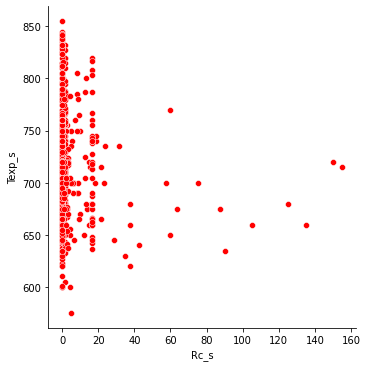

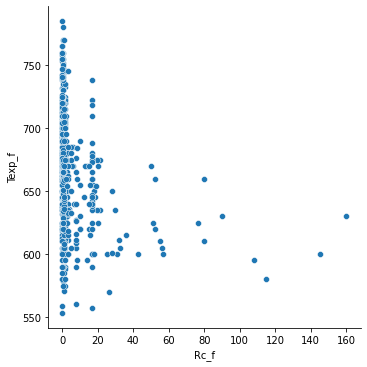

In [71]:
sns.relplot(x1,y1,data=result1, color='r')
sns.relplot(x2,y2,data=result1)
plt.show()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dave/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, size. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


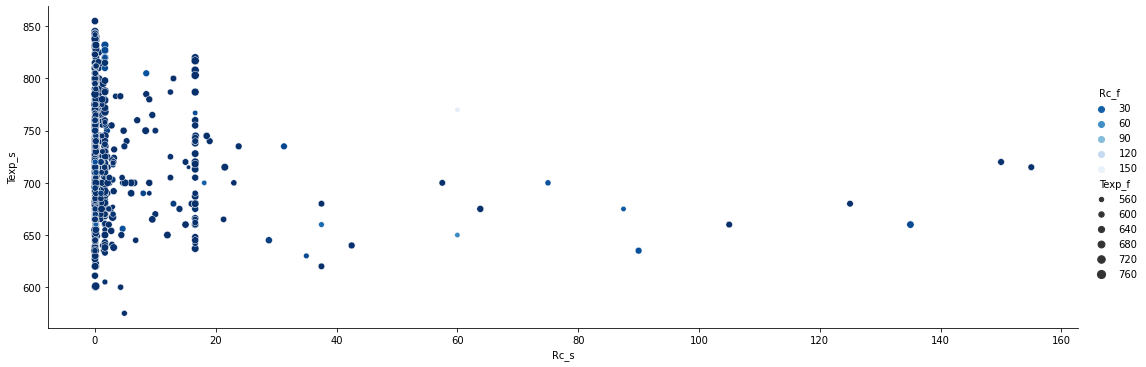

In [72]:
sns.relplot(x1, y1, x2, y2, data=result, aspect=3, hue='Rc_f', palette='Blues_r')


/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


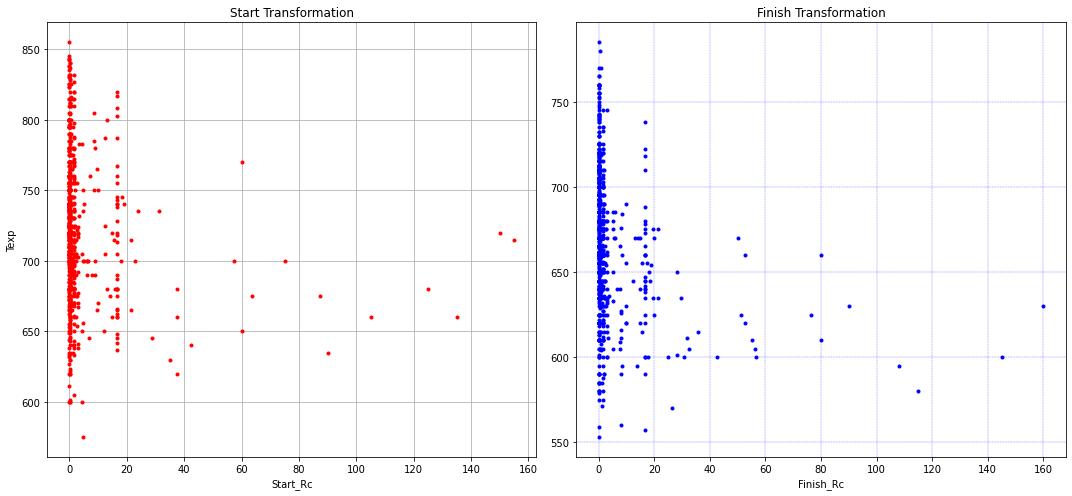

In [73]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize = (15,7))
axes[0].plot(x1, y1, '.',color='r', lw=2)
axes[0].grid(True)
axes[0].set_title('Start Transformation')
axes[0].set_xlabel('Start_Rc')
axes[0].set_ylabel('Texp')

axes[1].plot(x2, y2, '.', color='b' )
axes[1].grid(color='b', ls = '-.', lw = 0.25)
axes[1].set_title('Finish Transformation')
axes[1].set_xlabel('Finish_Rc')

fig.tight_layout()
plt.show()

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


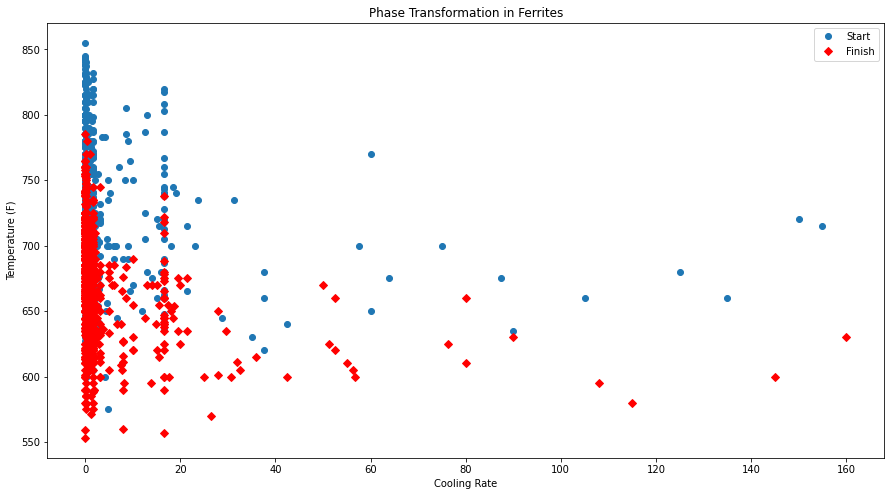

In [74]:
fig, axes = plt.subplots( 1,1, figsize = (15,8))

plt.plot( x1, y1, 'o')
plt.plot( x2, y2, 'D', color='r')
plt.title('Phase Transformation in Ferrites')
plt.xlabel('Cooling Rate')
plt.ylabel('Temperature (F)')
plt.legend(['Start', 'Finish']) 

In [75]:
import math
def EuclideanDistance(R1,R2,T1,T2):
    dist = np.sqrt((R2 - R1)**2 + (T2 - T1)**2)
    return dist
#print (calculateDistance(x1, y1, x2, y2))

RESULT = pd.DataFrame(result)
R2 = RESULT[["Rc_f"]]
T2 = RESULT[["Texp_f"]]
R1 = RESULT[["Rc_s"]]
T1 = RESULT[["Texp_s"]]

RESULT['Eucl_Dist'] = EuclideanDistance(RESULT['Rc_f'], RESULT['Texp_f'], RESULT['Rc_s'], RESULT['Texp_s'])
#RESULTS=RESULT.sort_values('Eucl_Dist', ascending=False)
RESULT

/home/dave/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rc_s,Texp_s,Rc_f,Texp_f,Eucl_Dist
0,60.000,770,145.000,600,843.282278
1,8.500,805,21.500,675,1030.278846
2,0.650,825,2.000,690,1073.730377
3,0.050,840,0.195,695,1090.077975
4,0.004,855,0.019,700,1104.984869
...,...,...,...,...,...
855,1.000,690,7.500,640,935.295274
856,0.180,710,10.000,630,942.467205
857,0.045,720,20.000,625,940.404276
858,8.400,750,0.100,720,1033.550468
